In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
save_figure = False

In [3]:
def restruct_array(content):
    # concatenate all np.ndarray to an array
    time = np.reshape((content.item()['push_time']-content.item()['start_time'])[1:, :], (1, -1))
    train_loss = np.reshape(content.item()['train_loss'][1:, :], (1, -1))
    train_acc = np.reshape(content.item()['train_acc'][1:, :], (1, -1))
    test_loss = np.reshape(content.item()['test_loss'][1:, :], (1, -1))
    test_acc = np.reshape(content.item()['test_acc'][1:, :], (1, -1))
    alles = np.concatenate((time, train_loss, train_acc, test_loss, test_acc))
    # sort the array by push time
    index = np.argsort(alles[0])
    alles = alles[:, index]
    # remove items unused
    index2 = alles[0, :] > 0
    alles = alles[:, index2]
    #print('----')
    #print('Min Loss:', np.min(alles[3]), ', at:', np.argmin(alles[3]))
    #print('Loss:', alles[3,-1], 'Acc:', alles[4,-1])
    #print('----')
    return alles

In [4]:
ASP = []
BSP = []
SSP = []
small = [0, 71, 138, 187, 224, 254]
target_dic = './record/DBSL_npy_1080/shuffle_data_without_split/'
for i, s in enumerate(small):
    ASP.append(
        restruct_array(
            np.load(f'{target_dic}/ASP_5GPU_1.05extra_{i}small_{s}batchSize.npy',
                    allow_pickle=True)))
for i, s in enumerate(small):
    BSP.append(
        restruct_array(
            np.load(f'{target_dic}/BSP_5GPU_1.05extra_{i}small_{s}batchSize.npy',
                    allow_pickle=True)))
for i, s in enumerate(small):
    SSP.append(
        restruct_array(
            np.load(f'{target_dic}/SSP1_5GPU_1.05extra_{i}small_{s}batchSize.npy',
                    allow_pickle=True)))

In [5]:
# from '0 large n small' to 'n small 0 large'
print('ASP')
print(f'length: {len(ASP)}')

# npy axis 0
# time, train_loss, train_acc, test_loss, test_acc
print(f'shape: {ASP[0].shape}')

epo = 140
allGPUs = 5
smallGPUs = 0
print(f'total epochs: {ASP[0].shape[1] // allGPUs}')
print(f'epoch: {epo}, smallGPUs: {smallGPUs}')
print(f'train_loss: {ASP[smallGPUs][1][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'train_acc: {ASP[smallGPUs][2][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_loss: {ASP[smallGPUs][3][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_acc: {ASP[smallGPUs][4][(epo - 1) * allGPUs + (allGPUs - 1)]}')

ASP
length: 6
shape: (5, 700)
total epochs: 140
epoch: 140, smallGPUs: 0
train_loss: 0.07646027952432632
train_acc: 0.9884762167930603
test_loss: 1.3751392364501953
test_acc: 0.6751000285148621


In [6]:
# from '0 large n small' to 'n small 0 large'
print('BSP')
print(f'length: {len(BSP)}')

# npy axis 0
# time, train_loss, train_acc, test_loss, test_acc
print(f'shape: {BSP[0].shape}')

epo = 67
allGPUs = 5
smallGPUs = 0
print(f'total epochs: {BSP[0].shape[1] // allGPUs}')
print(f'epoch: {epo}, smallGPUs: {smallGPUs}')
print(f'train_loss: {BSP[smallGPUs][1][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'train_acc: {BSP[smallGPUs][2][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_loss: {BSP[smallGPUs][3][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_acc: {BSP[smallGPUs][4][(epo - 1) * allGPUs + (allGPUs - 1)]}')

BSP
length: 6
shape: (5, 700)
total epochs: 140
epoch: 67, smallGPUs: 0
train_loss: 0.4356975555419922
train_acc: 0.8669523596763611
test_loss: 1.6193125247955322
test_acc: 0.623199999332428


In [7]:
# from '0 large n small' to 'n small 0 large'
print('SSP, threshold = 1')
print(f'length: {len(SSP)}')

# npy axis 0
# time, train_loss, train_acc, test_loss, test_acc
print(f'shape: {SSP[0].shape}')

epo = 140
allGPUs = 5
smallGPUs = 0
print(f'total epochs: {SSP[0].shape[1] // allGPUs}')
print(f'epoch: {epo}, smallGPUs: {smallGPUs}')
print(f'train_loss: {SSP[smallGPUs][1][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'train_acc: {SSP[smallGPUs][2][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_loss: {SSP[smallGPUs][3][(epo - 1) * allGPUs + (allGPUs - 1)]}')
print(f'test_acc: {SSP[smallGPUs][4][(epo - 1) * allGPUs + (allGPUs - 1)]}')

SSP, threshold = 1
length: 6
shape: (5, 700)
total epochs: 140
epoch: 140, smallGPUs: 0
train_loss: 0.06991767883300781
train_acc: 0.9884762167930603
test_loss: 1.3966854810714722
test_acc: 0.6700000166893005


In [8]:
label = []
for i, s in enumerate(small):
    label.append(f'{i} small, $B_S={s}$')

In [9]:
DPI = 300

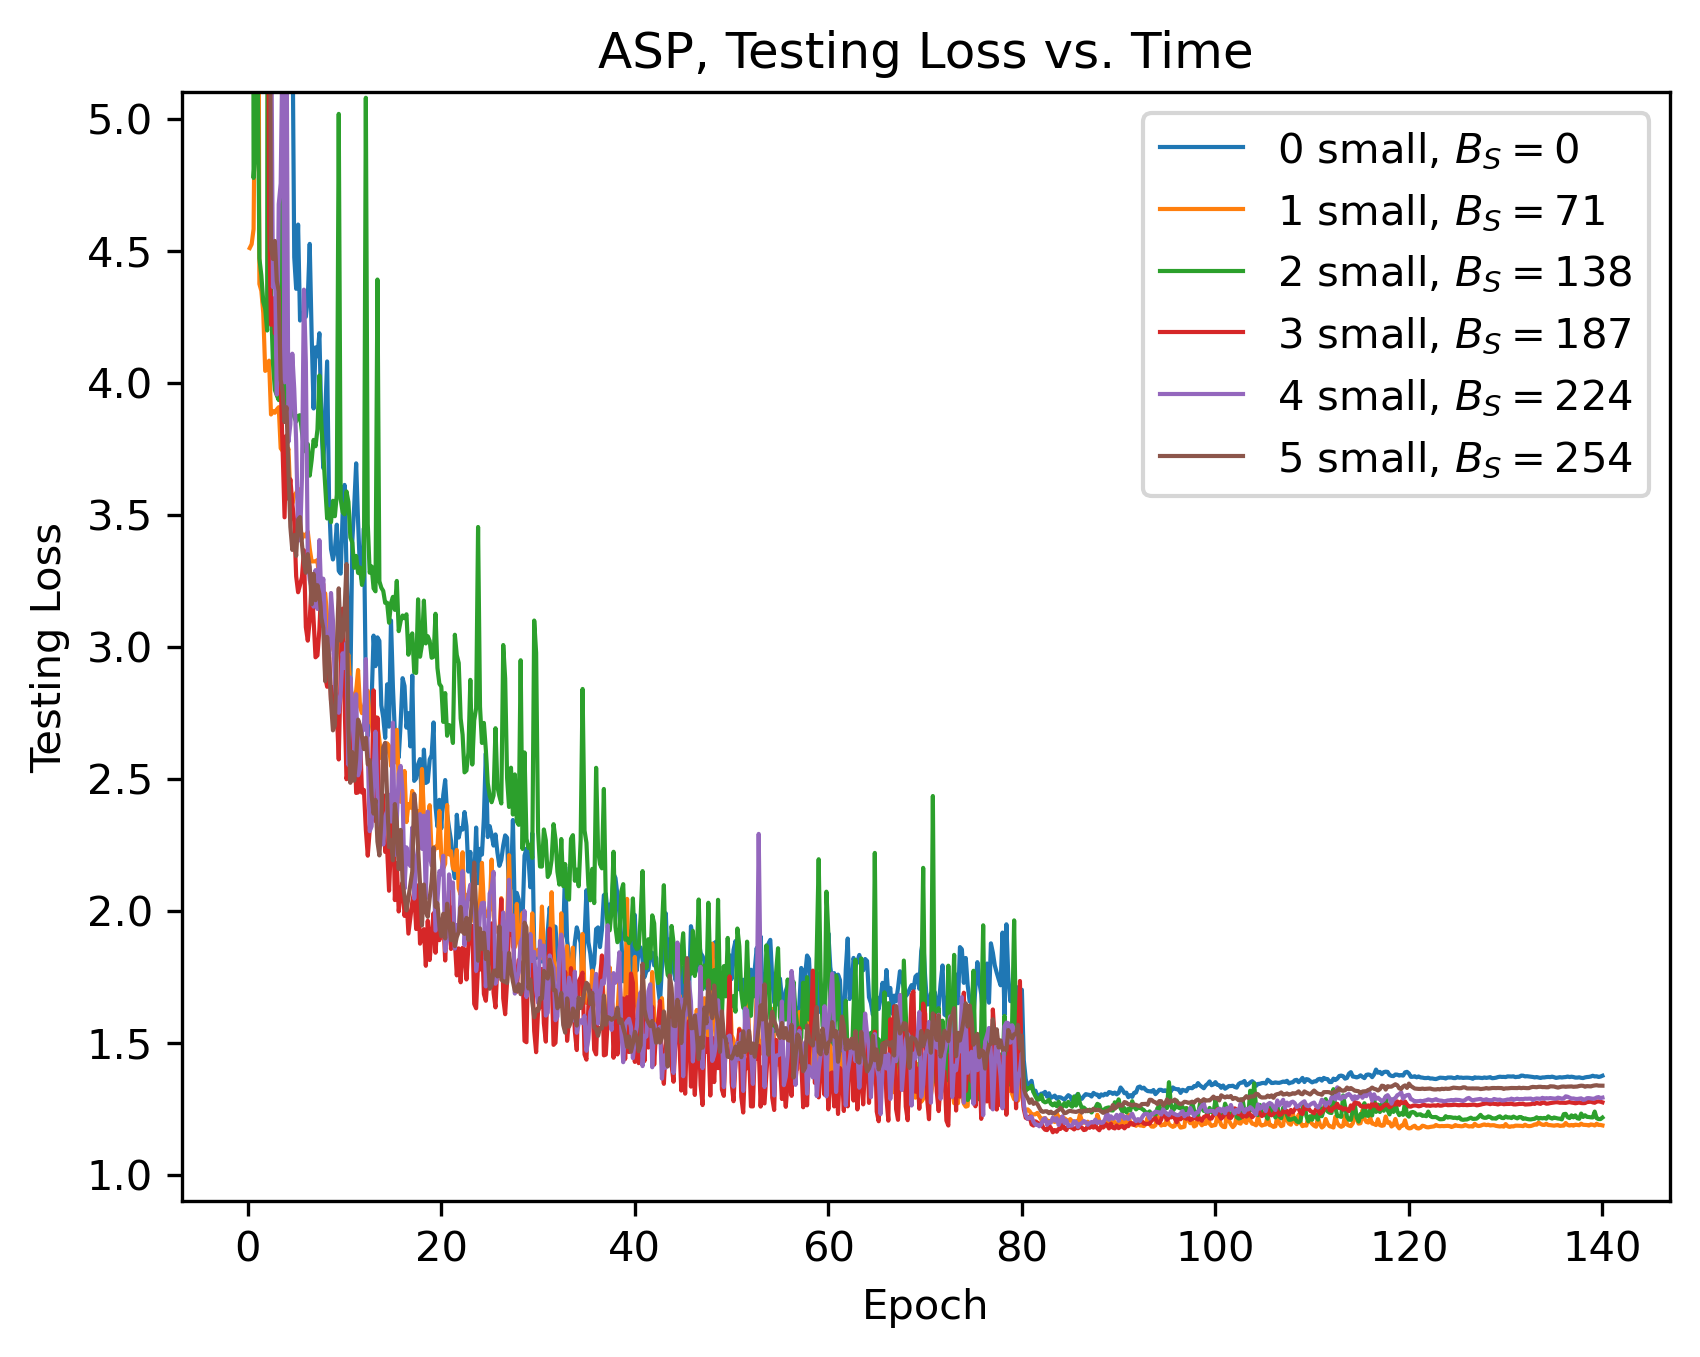

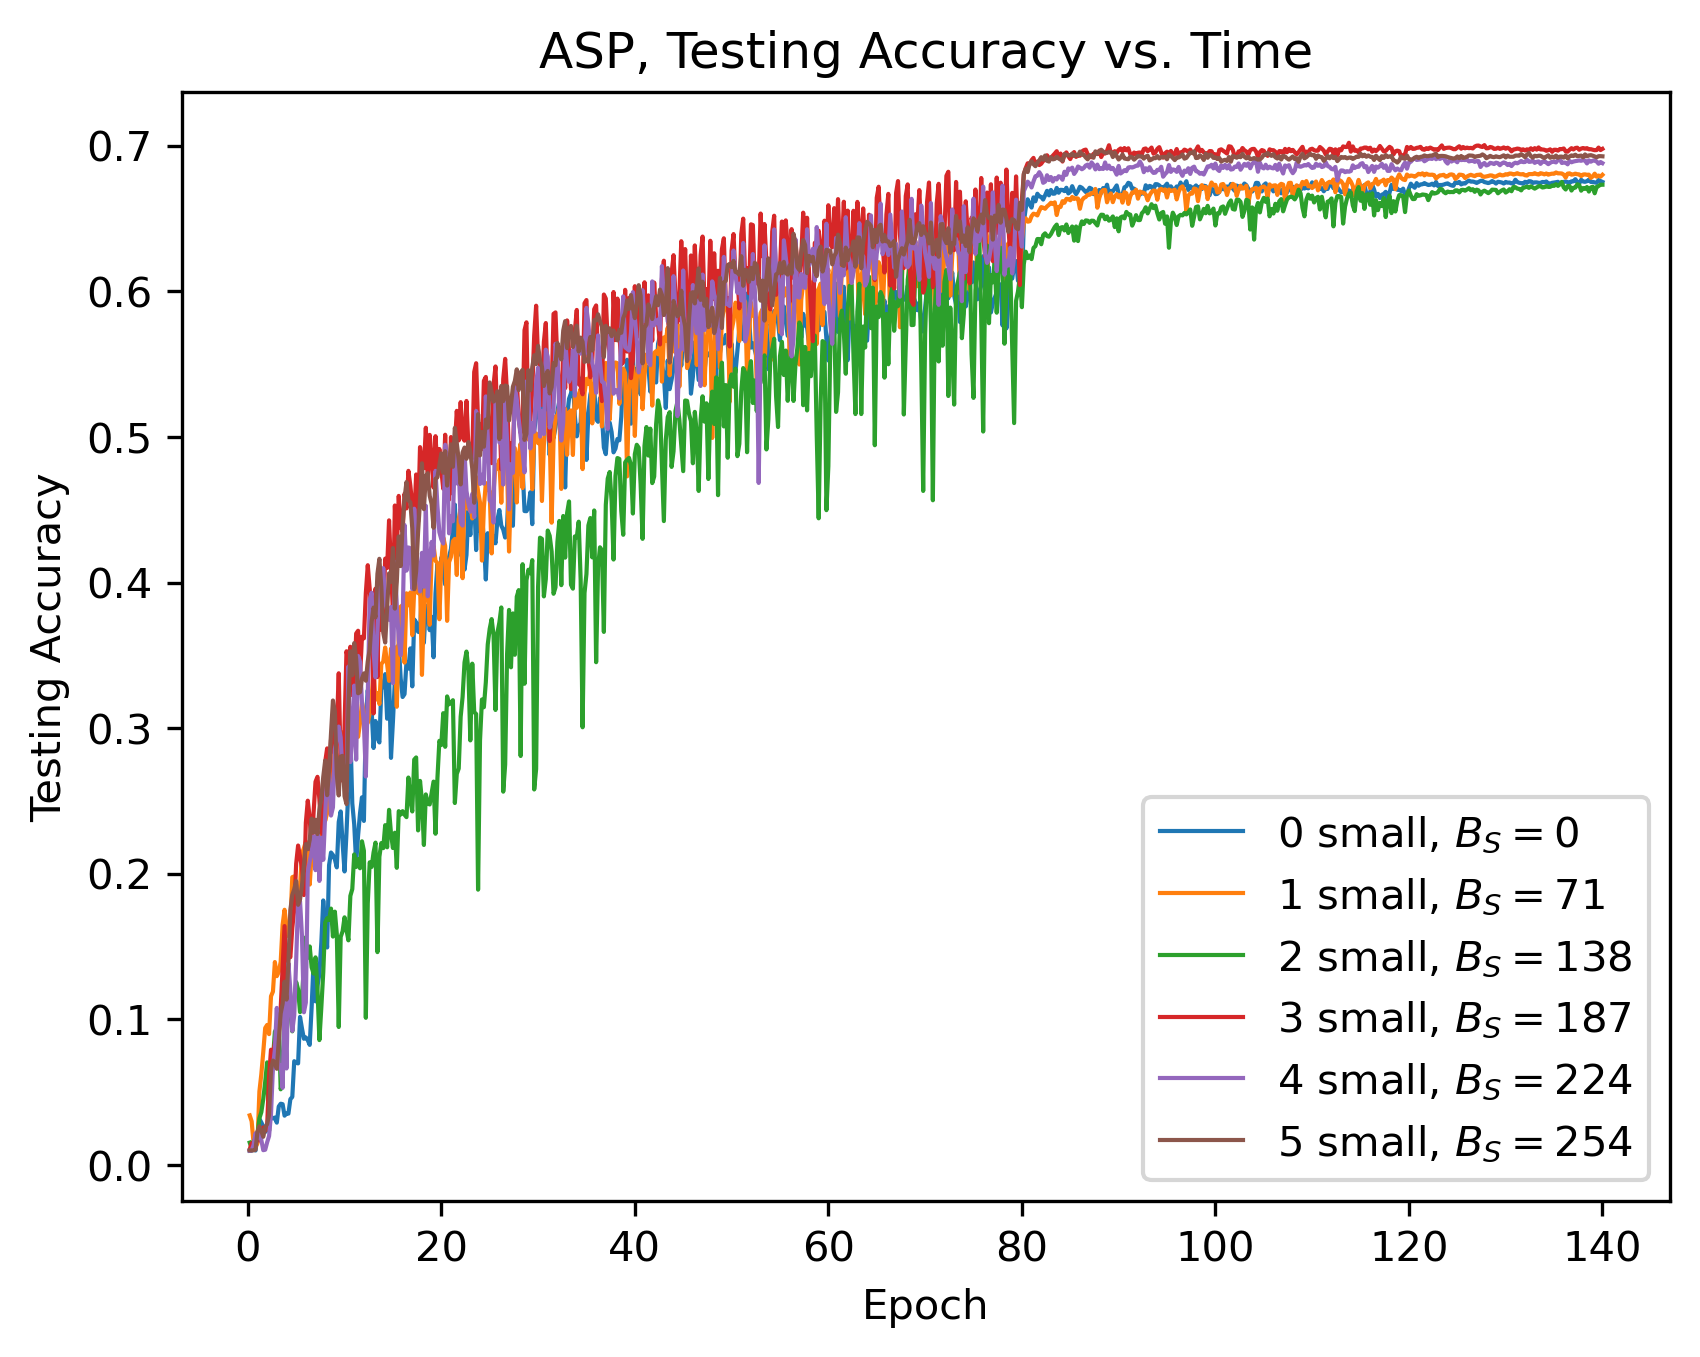

In [10]:
### ASP
## testing loss
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, ASP[i].shape[1]+1)/(len(ASP)-1), ASP[i][3], label=label[i], linewidth=1)
plt.ylim(0.9, 5.1)
plt.title('ASP, Testing Loss vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_ASP_loss.png', transparent=True)

## testing accuracy
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, ASP[i].shape[1]+1)/(len(ASP)-1), ASP[i][4], label=label[i], linewidth=1)
plt.title('ASP, Testing Accuracy vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_ASP_acc.png', transparent=True)

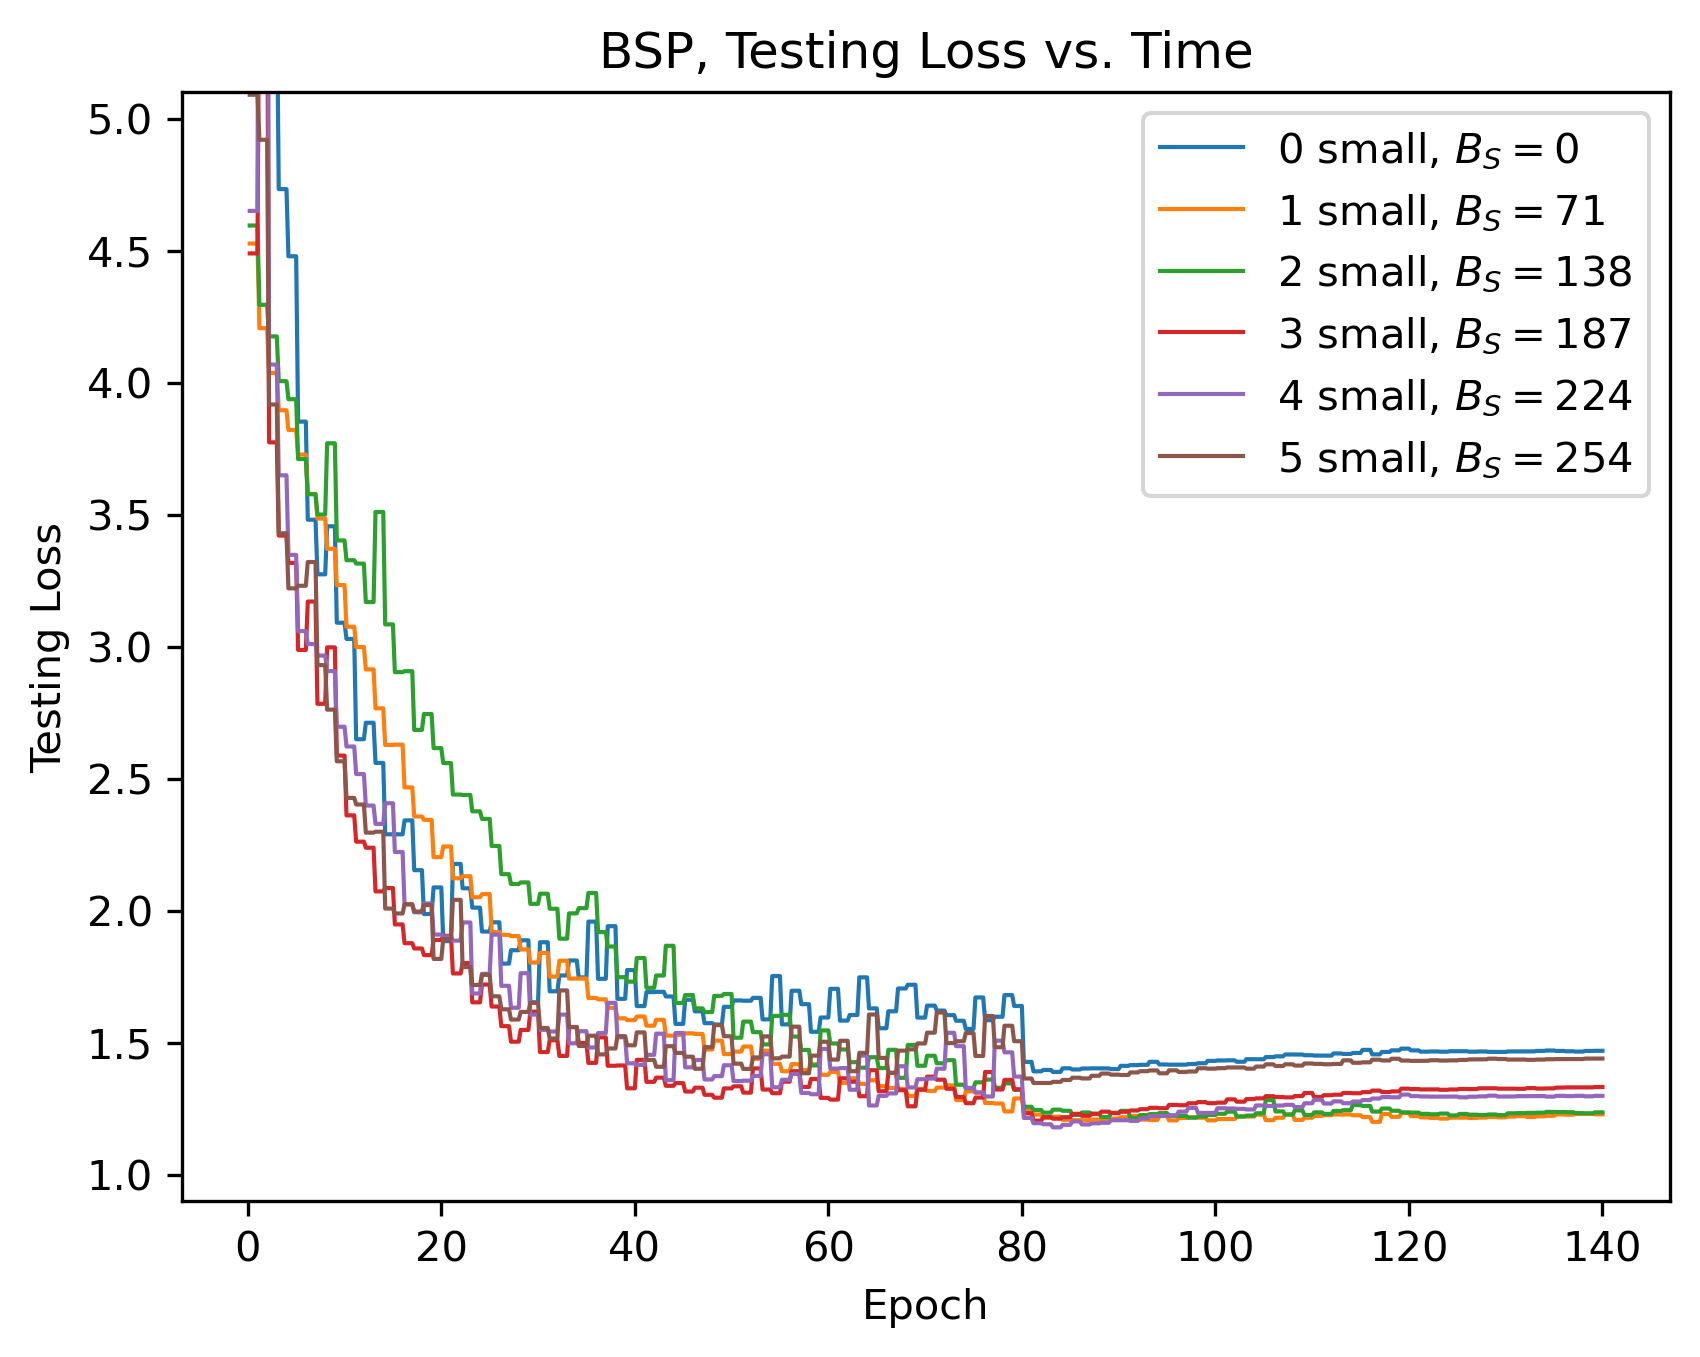

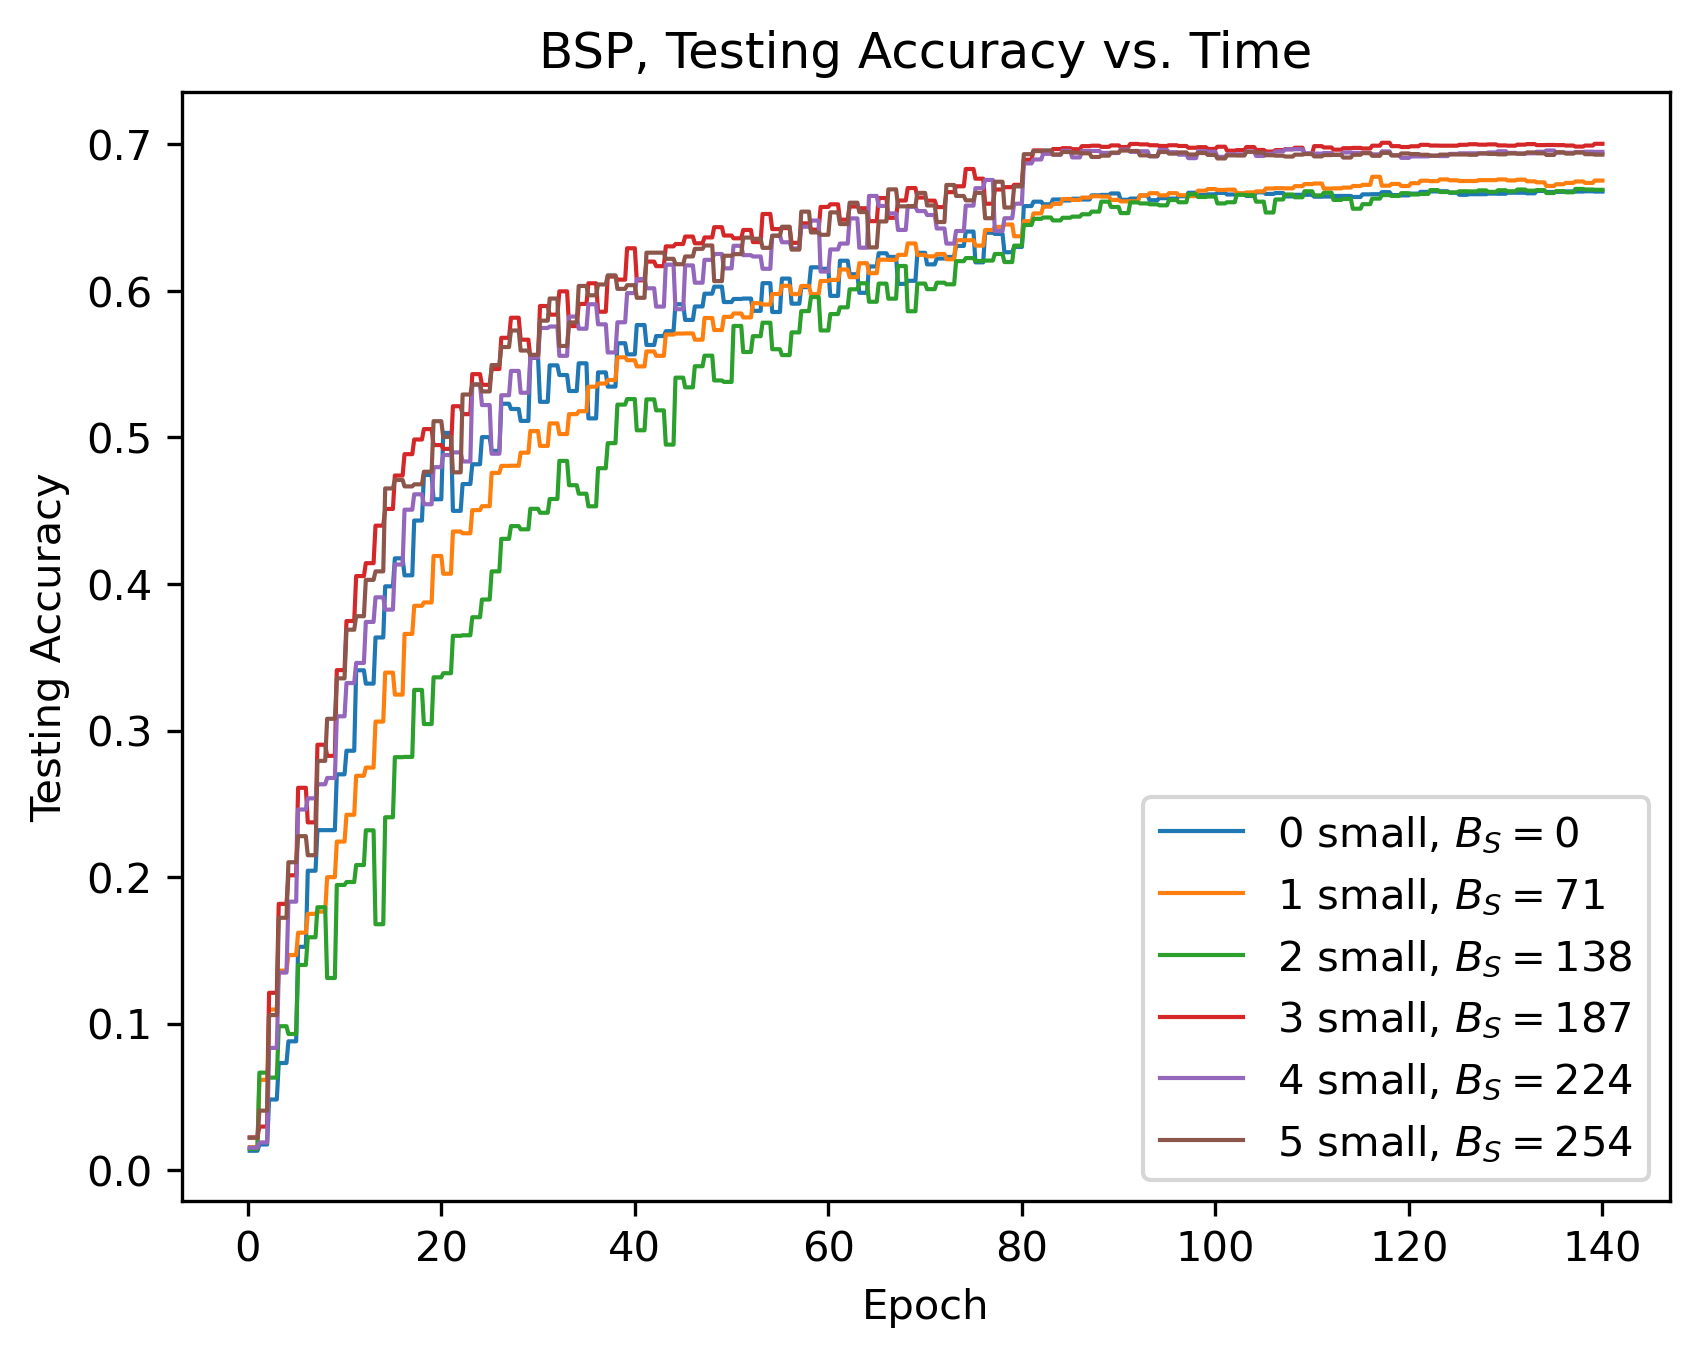

In [11]:
### BSP
## testing loss
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, BSP[i].shape[1]+1)/(len(BSP)-1), BSP[i][3], label=label[i], linewidth=1)
plt.ylim(0.9, 5.1)
plt.title('BSP, Testing Loss vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_BSP_loss.png', transparent=True)

## testing accuracy
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, BSP[i].shape[1]+1)/(len(BSP)-1), BSP[i][4], label=label[i], linewidth=1)
plt.title('BSP, Testing Accuracy vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_BSP_acc.png', transparent=True)

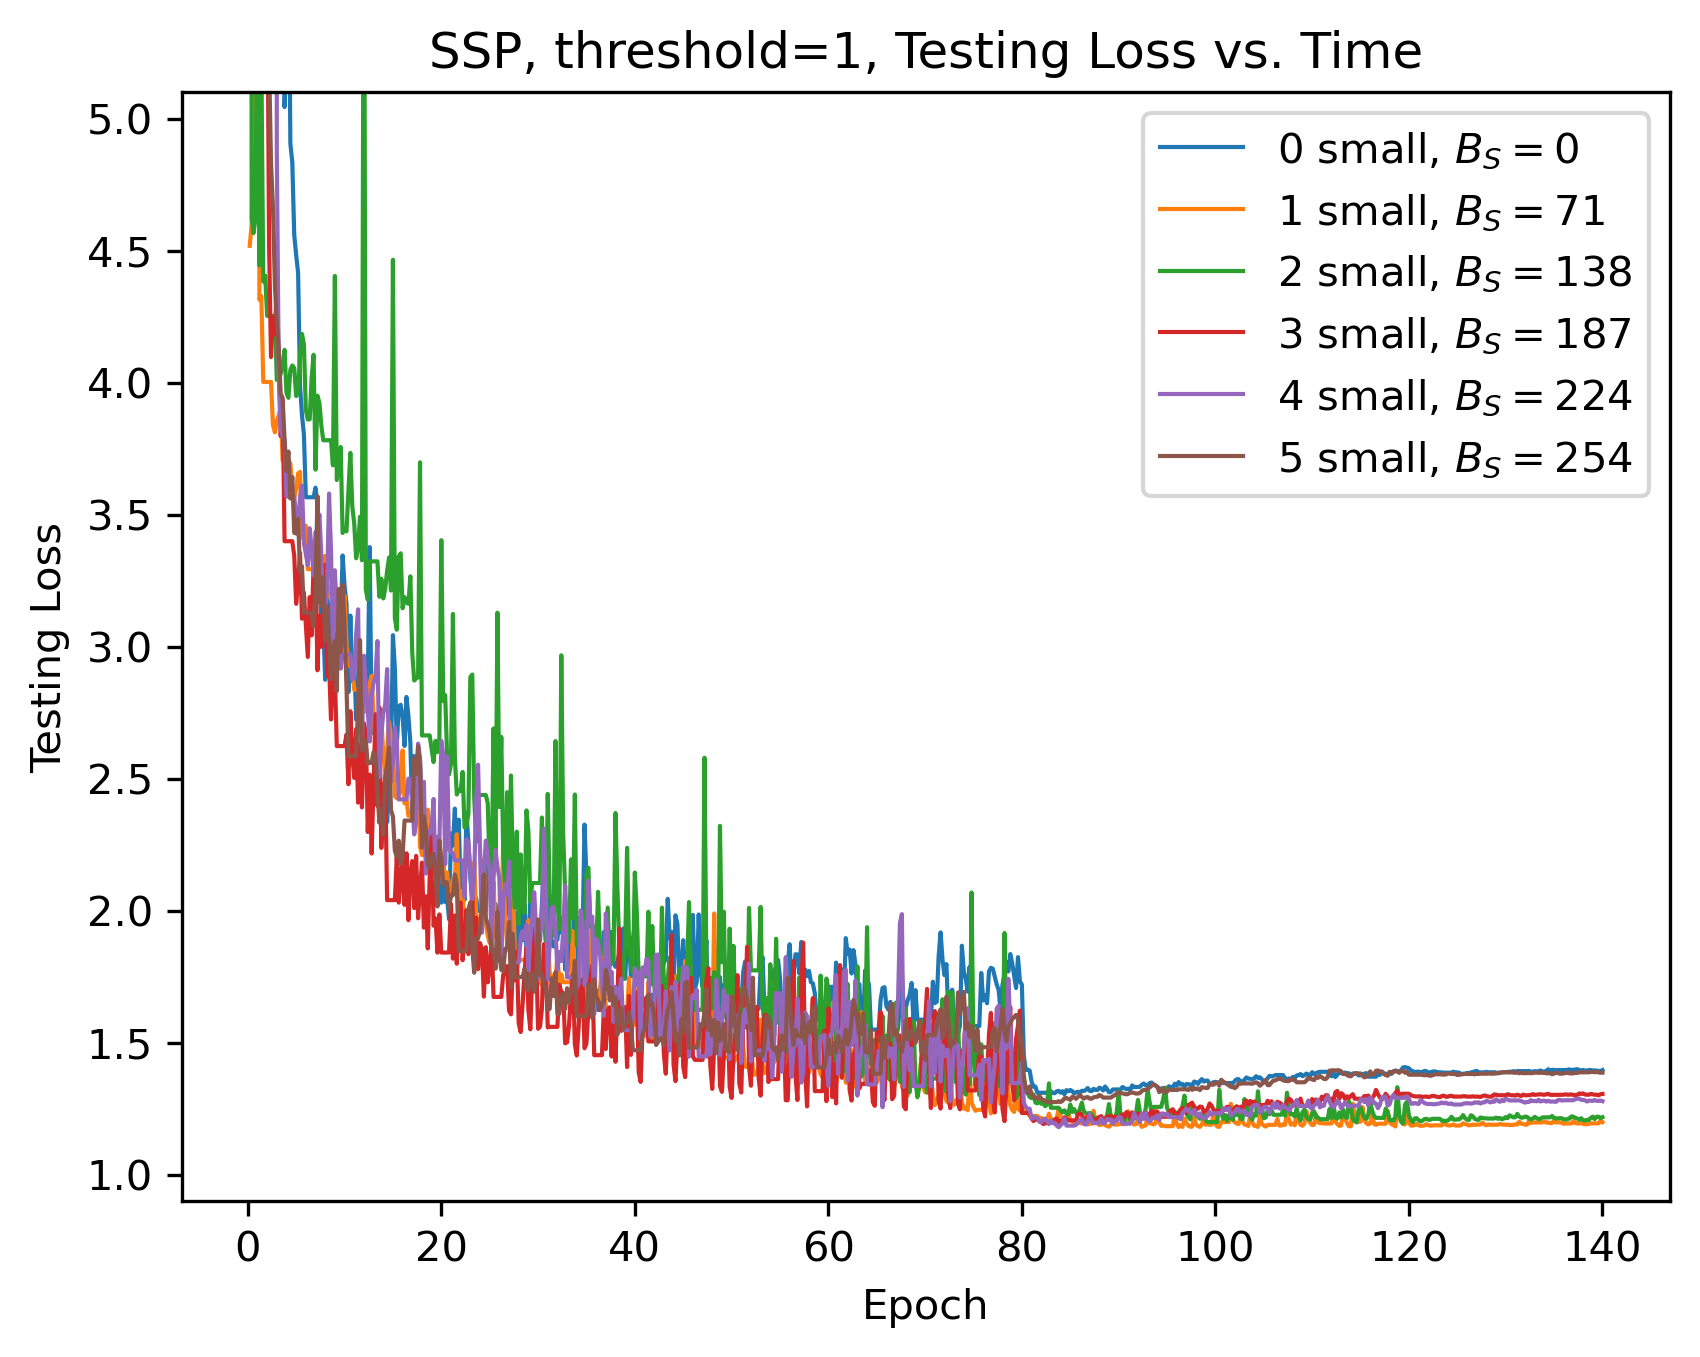

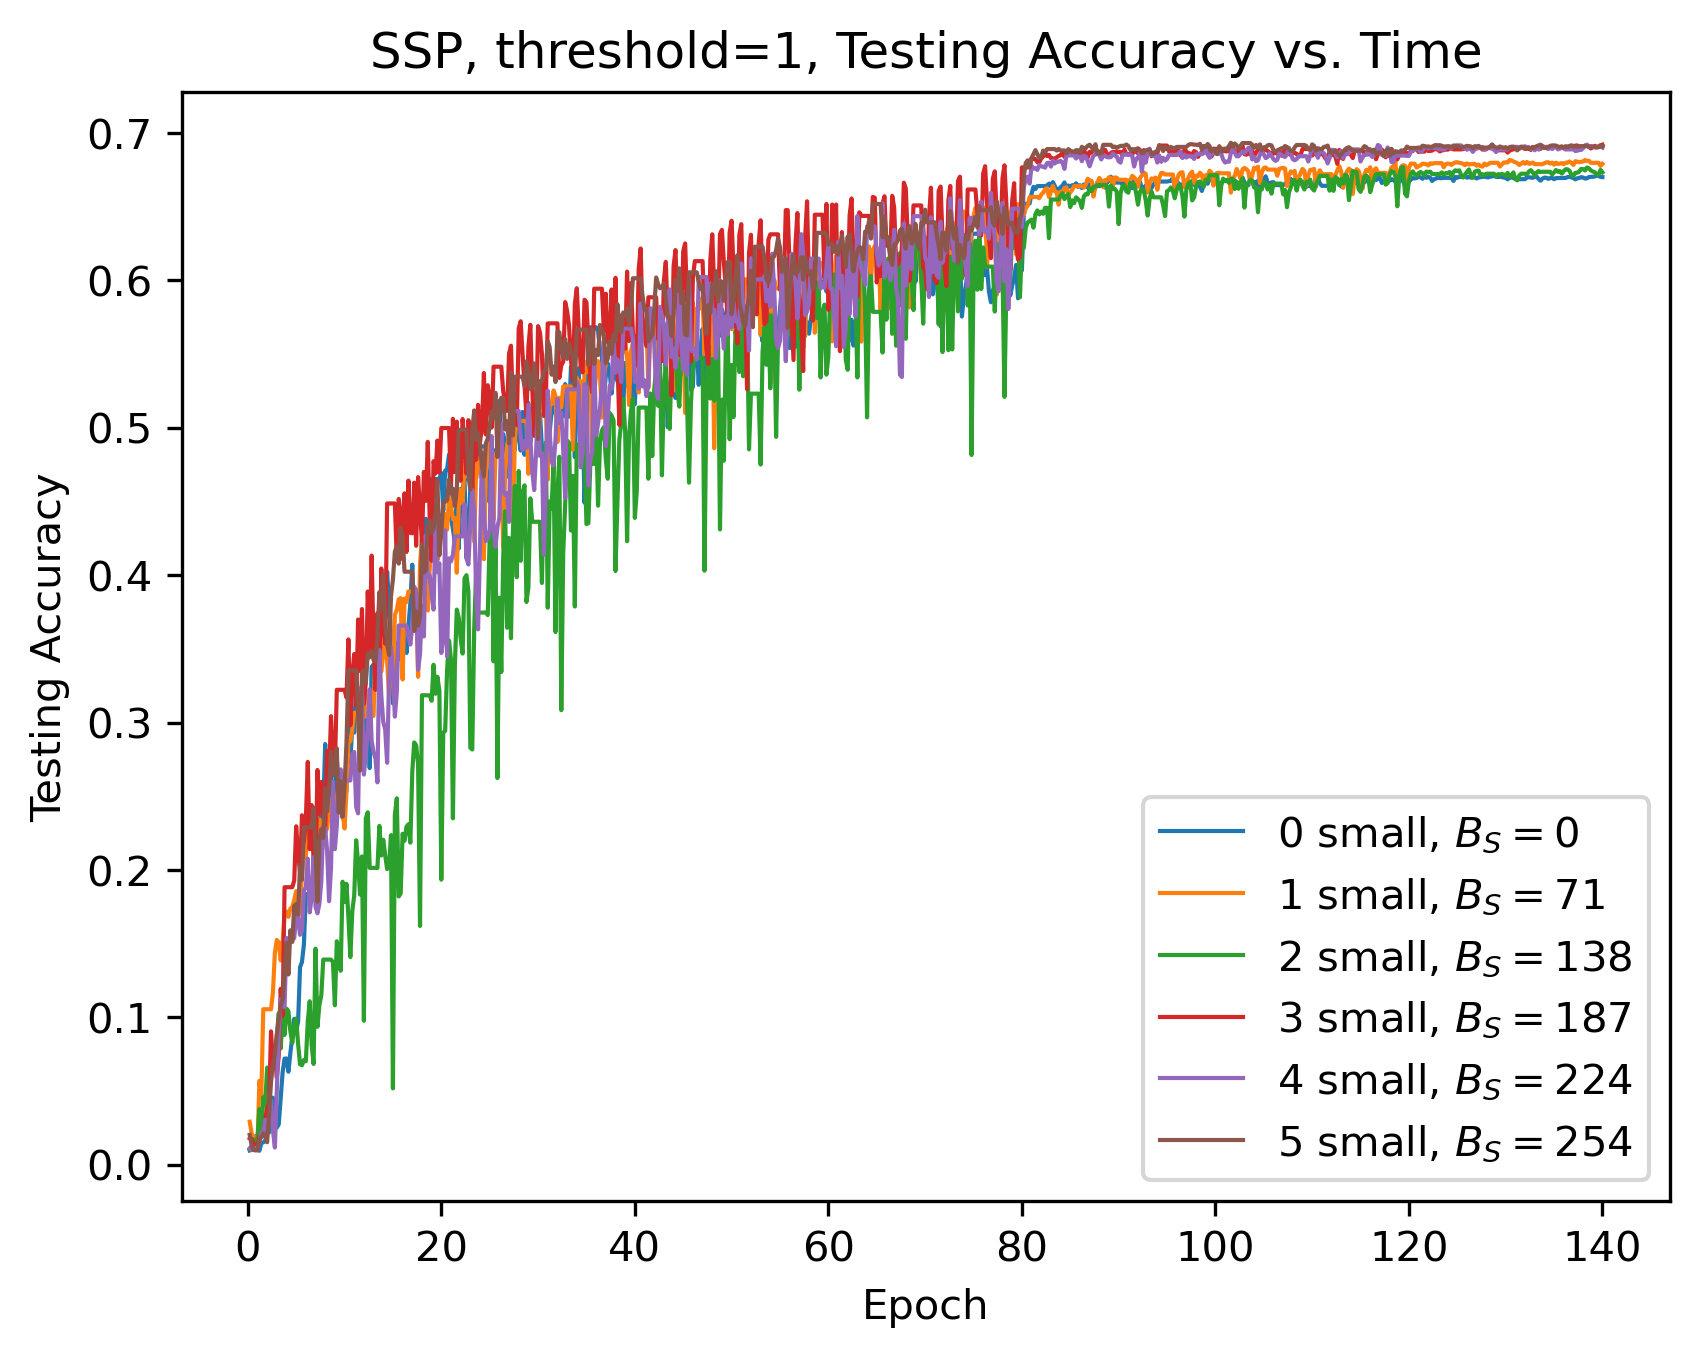

In [12]:
### SSP, threshold=1
## testing loss
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, SSP[i].shape[1]+1)/(len(SSP)-1), SSP[i][3], label=label[i], linewidth=1)
plt.ylim(0.9, 5.1)
plt.title('SSP, threshold=1, Testing Loss vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_SSP1_loss.png', transparent=True)

## testing accuracy
plt.figure(dpi=DPI)
for i in range(len(label)):
    plt.plot(np.arange(1, SSP[i].shape[1]+1)/(len(SSP)-1), SSP[i][4], label=label[i], linewidth=1)
plt.title('SSP, threshold=1, Testing Accuracy vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
#plt.show()
if save_figure:
    plt.savefig('./temp_figure/result_1080_5GPU_SSP1_acc.png', transparent=True)

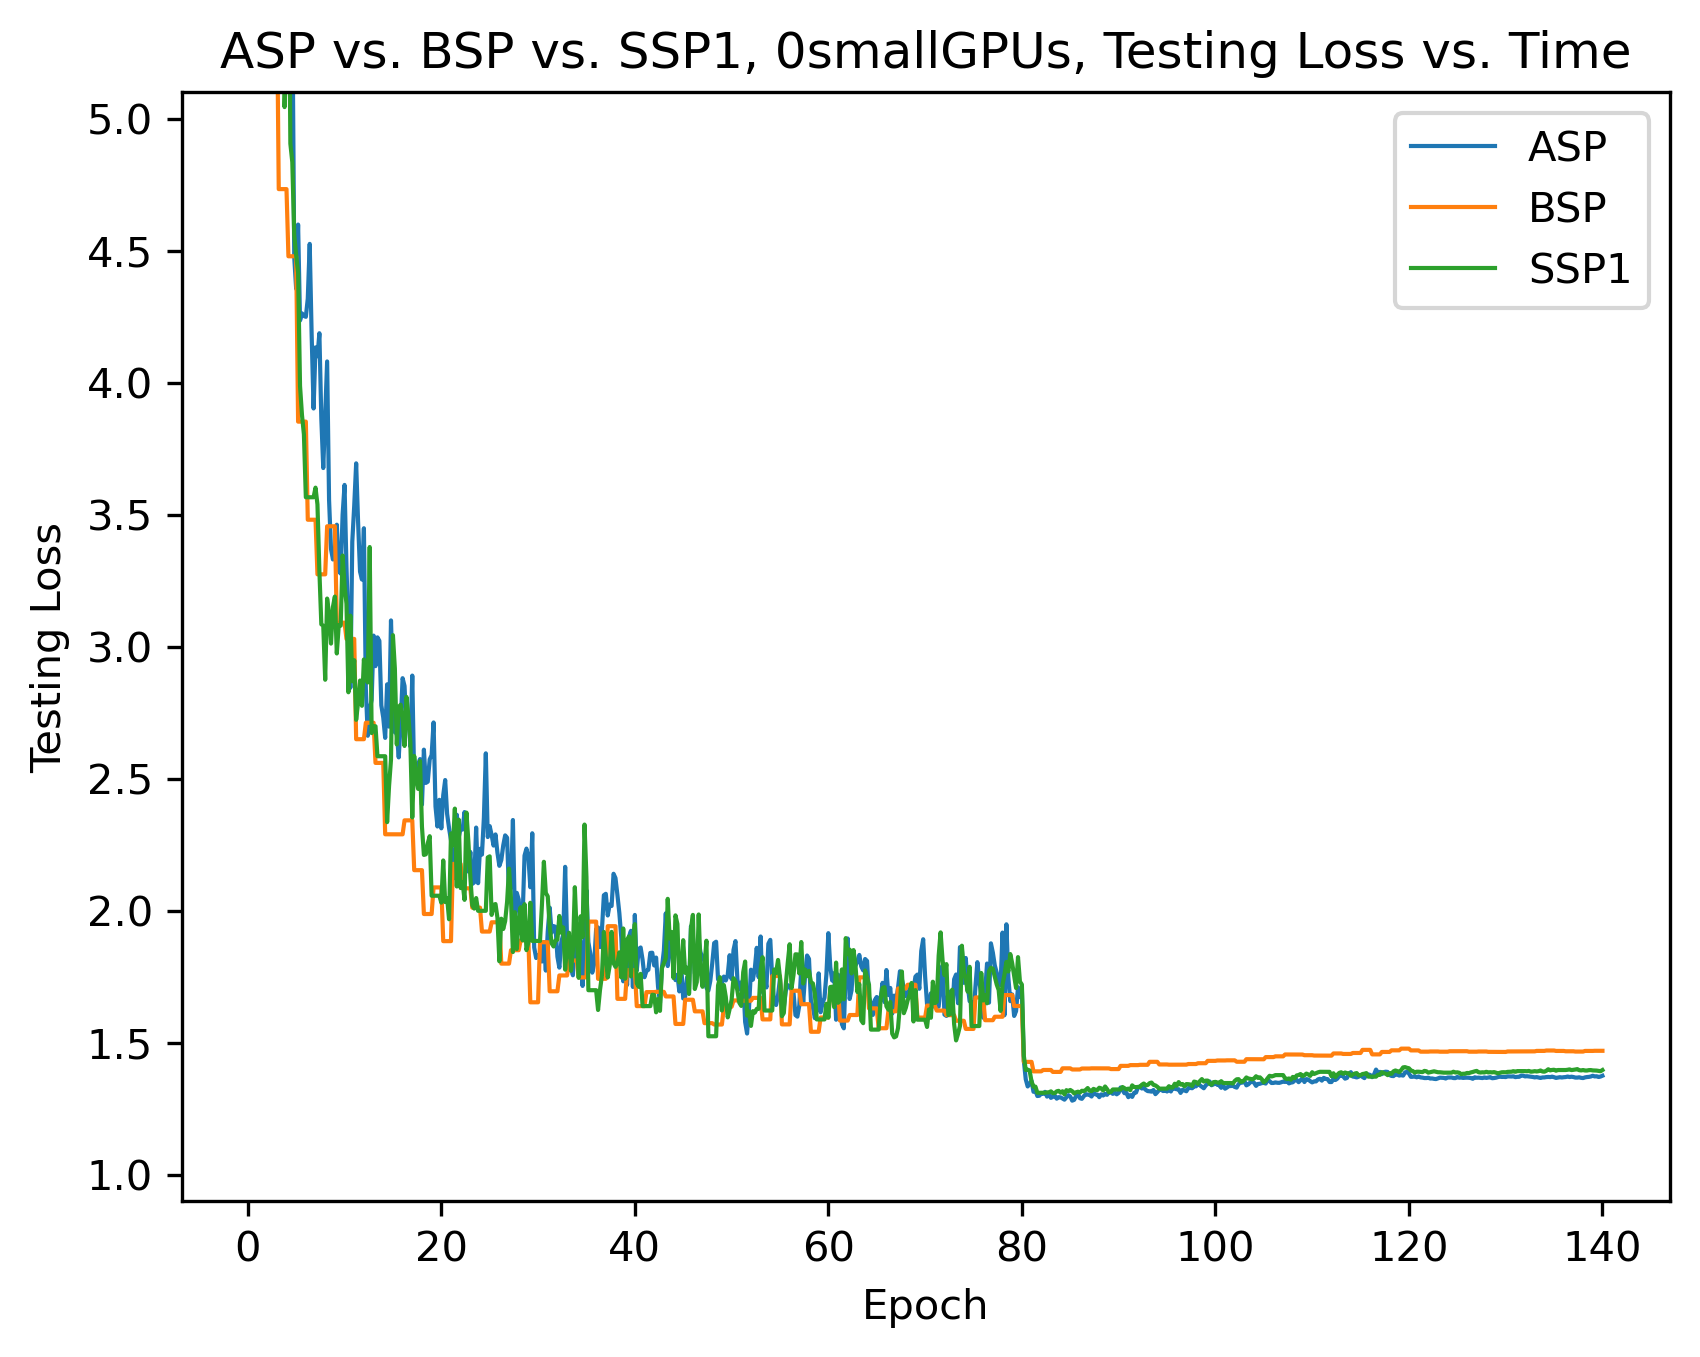

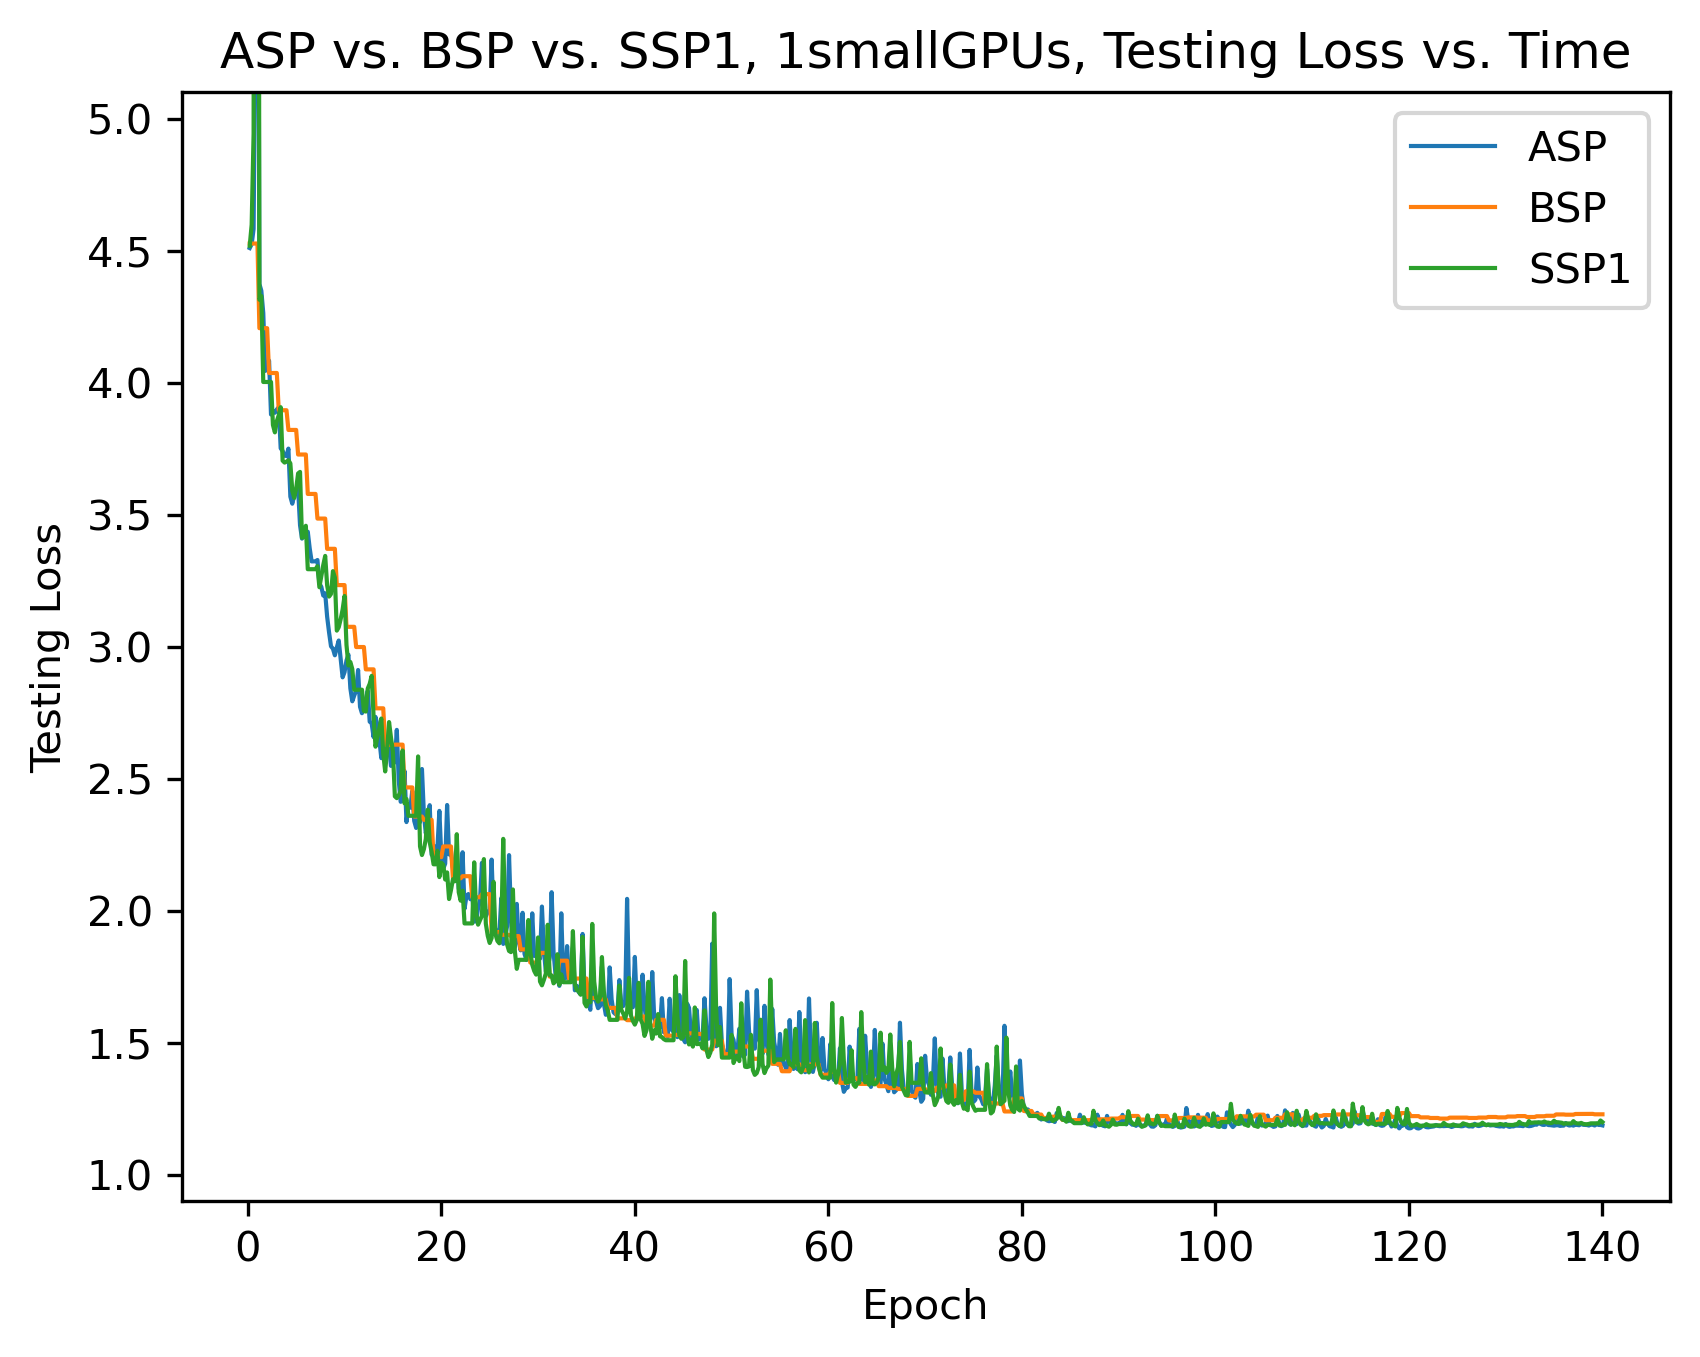

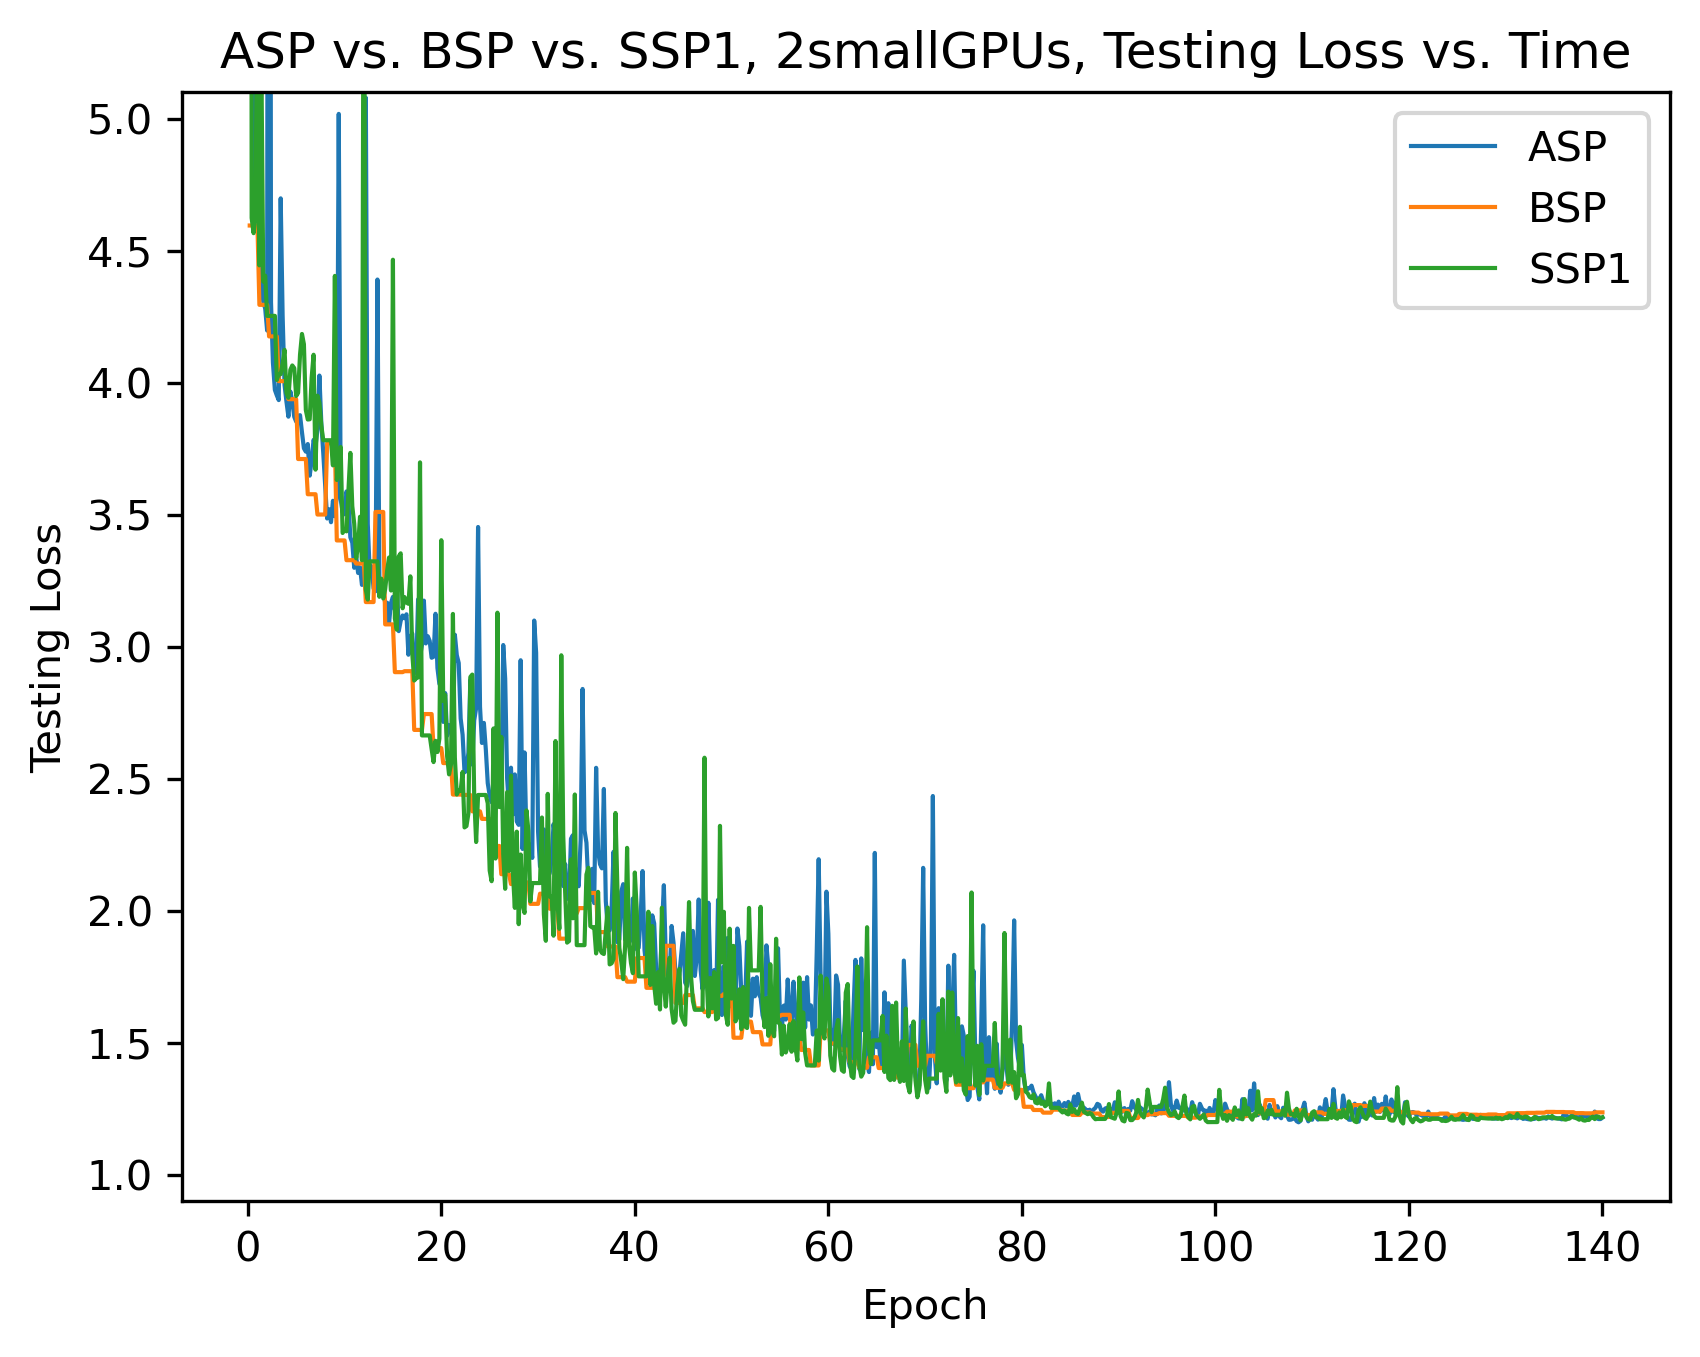

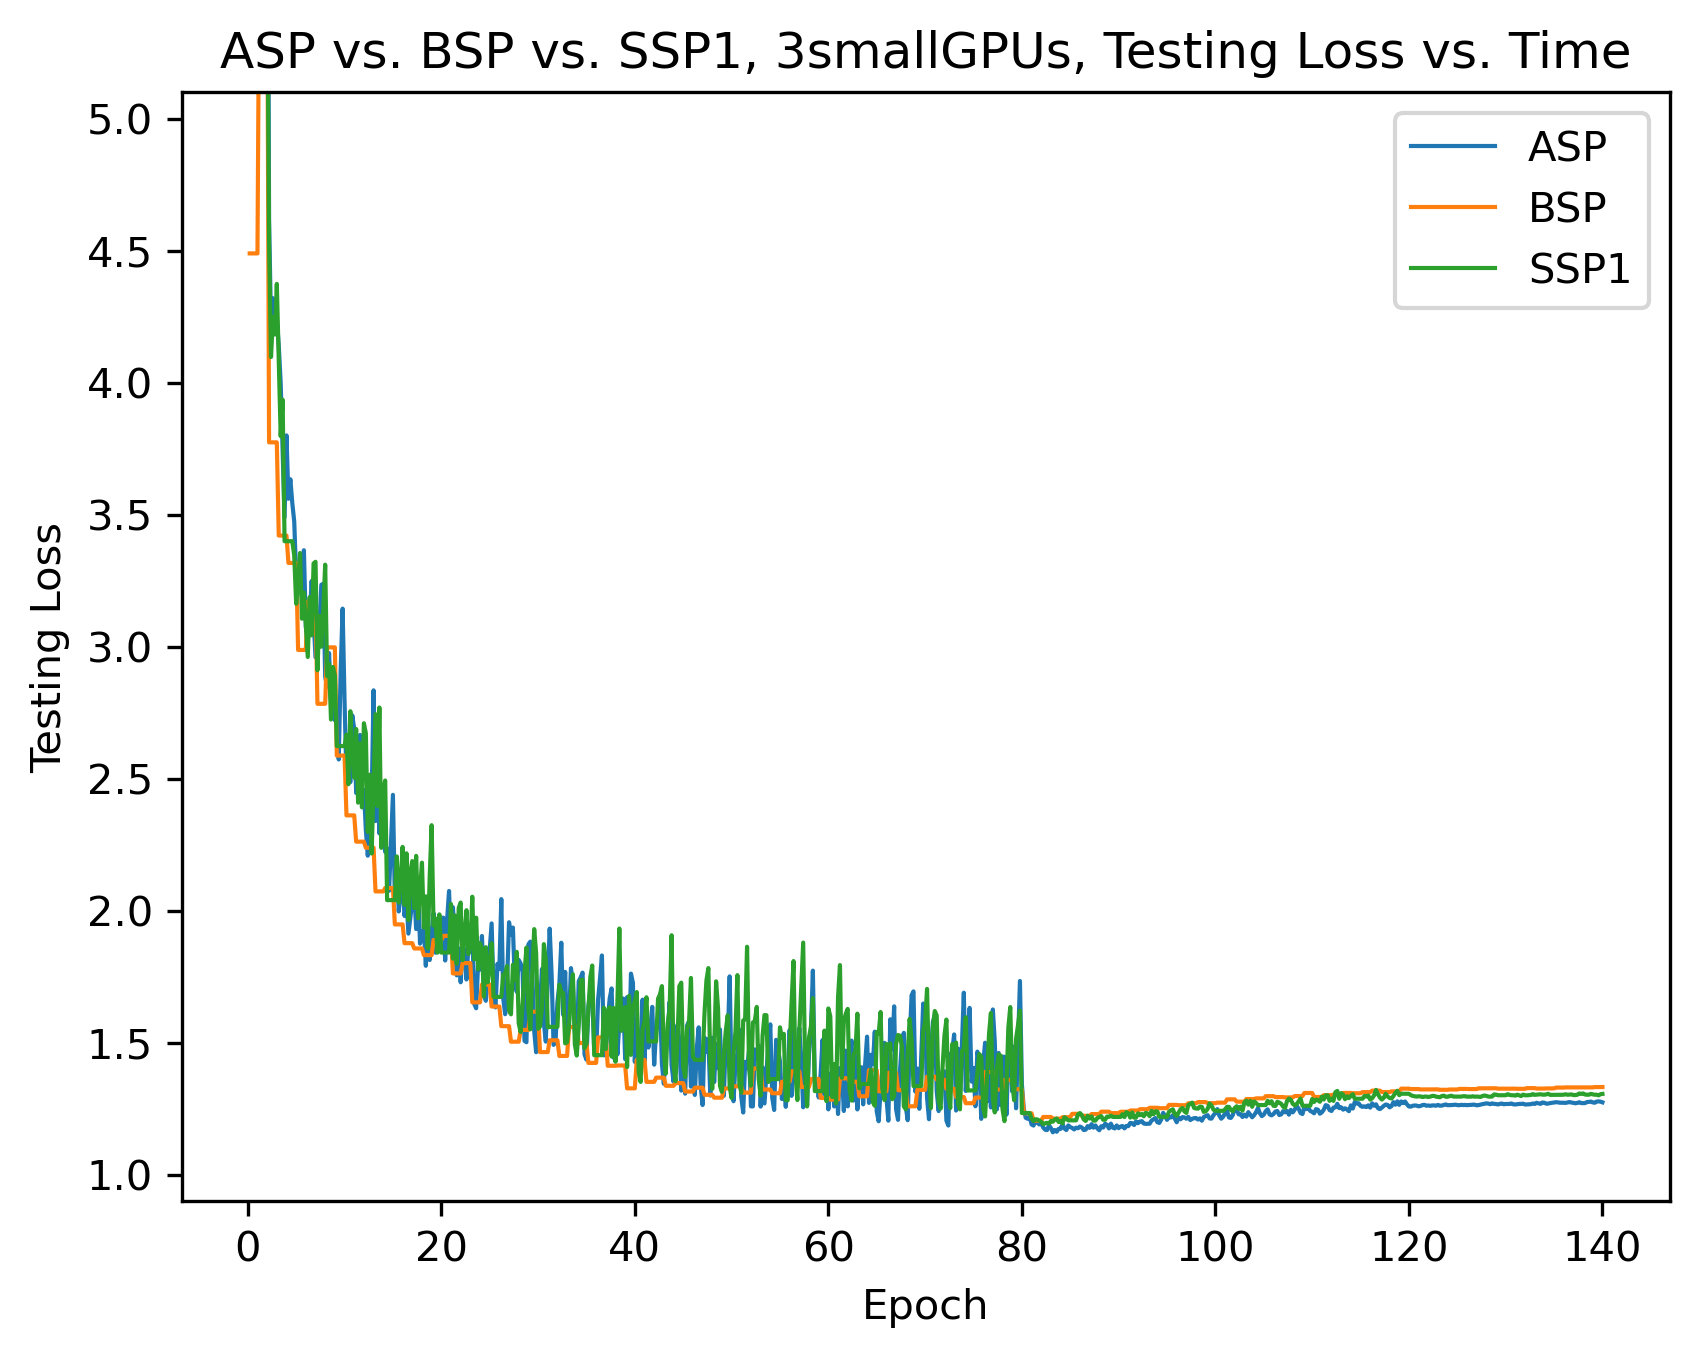

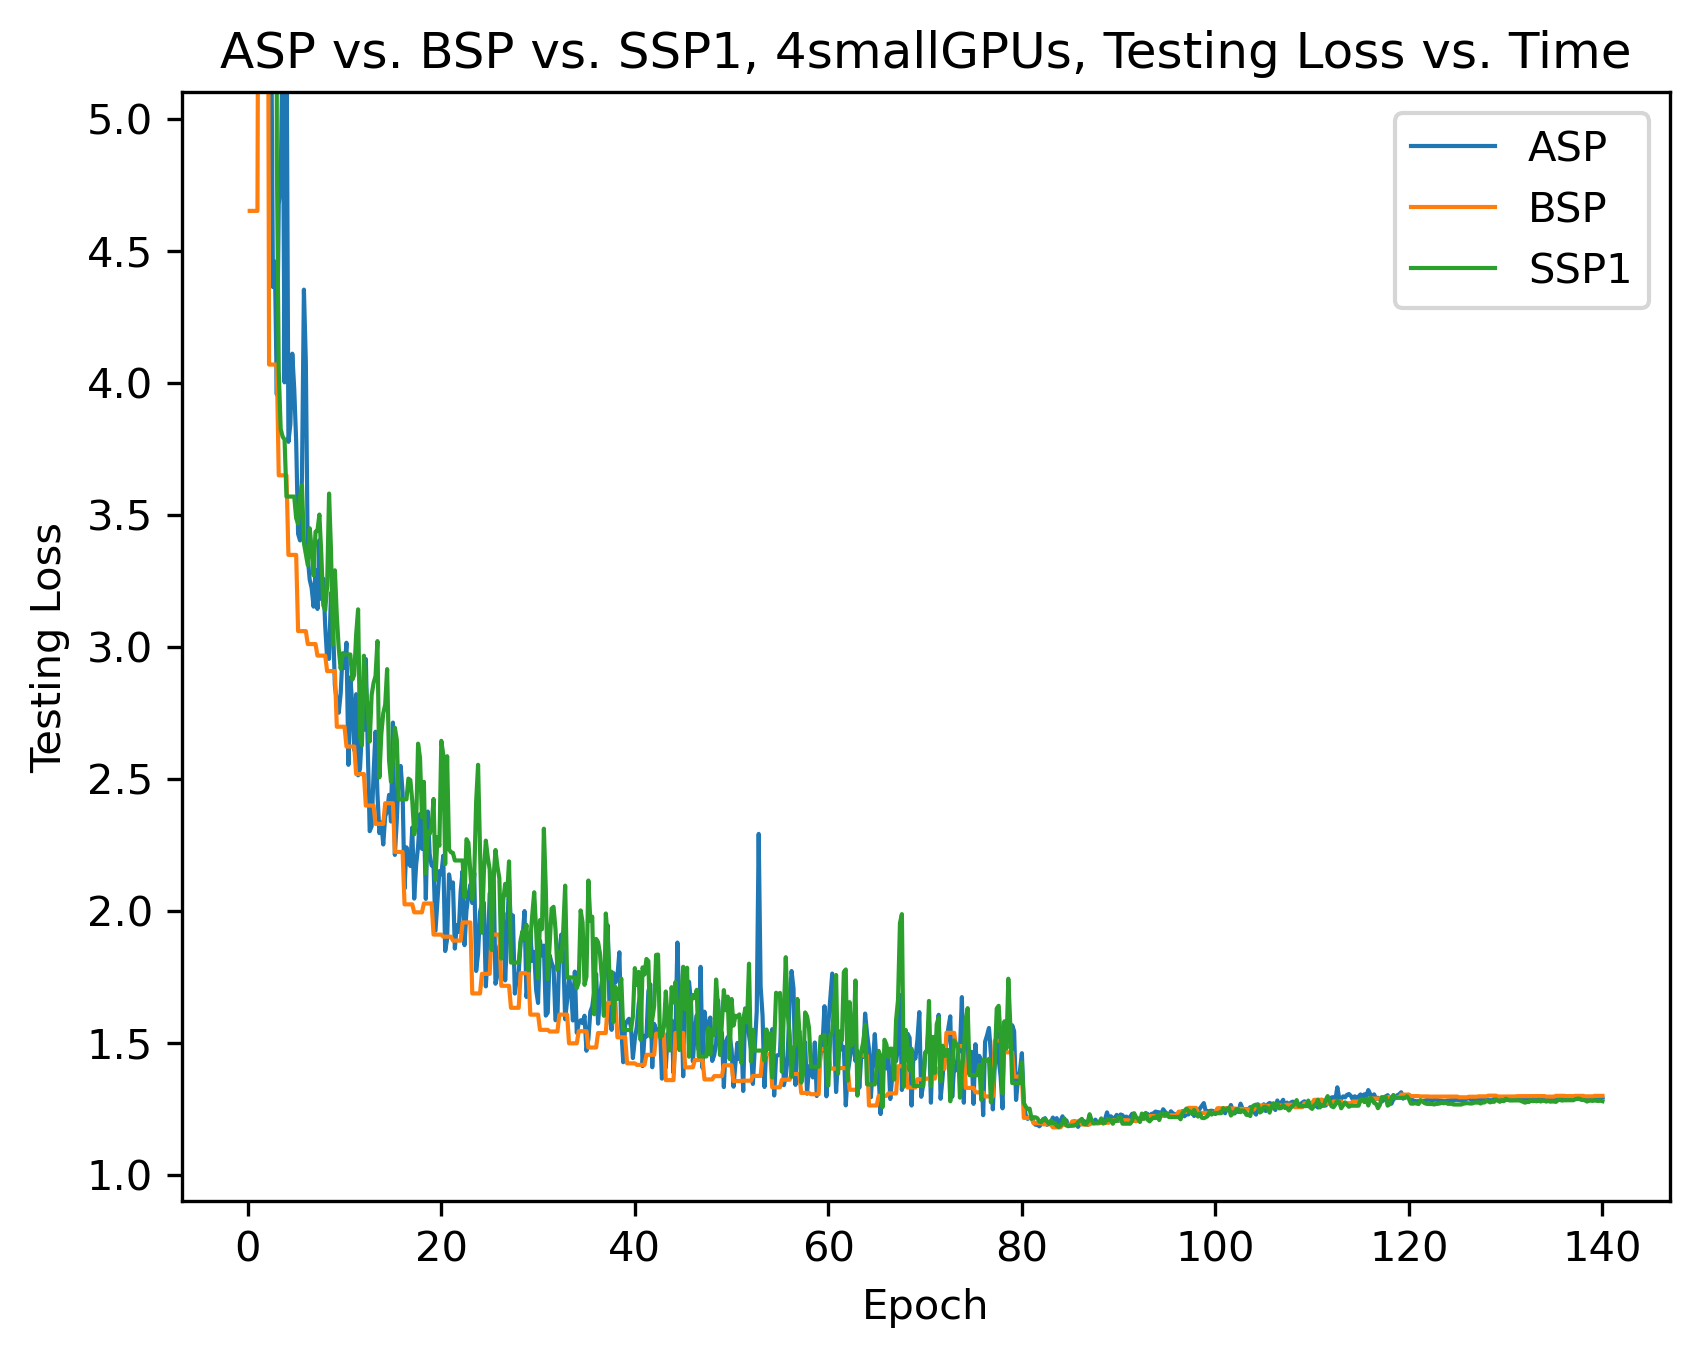

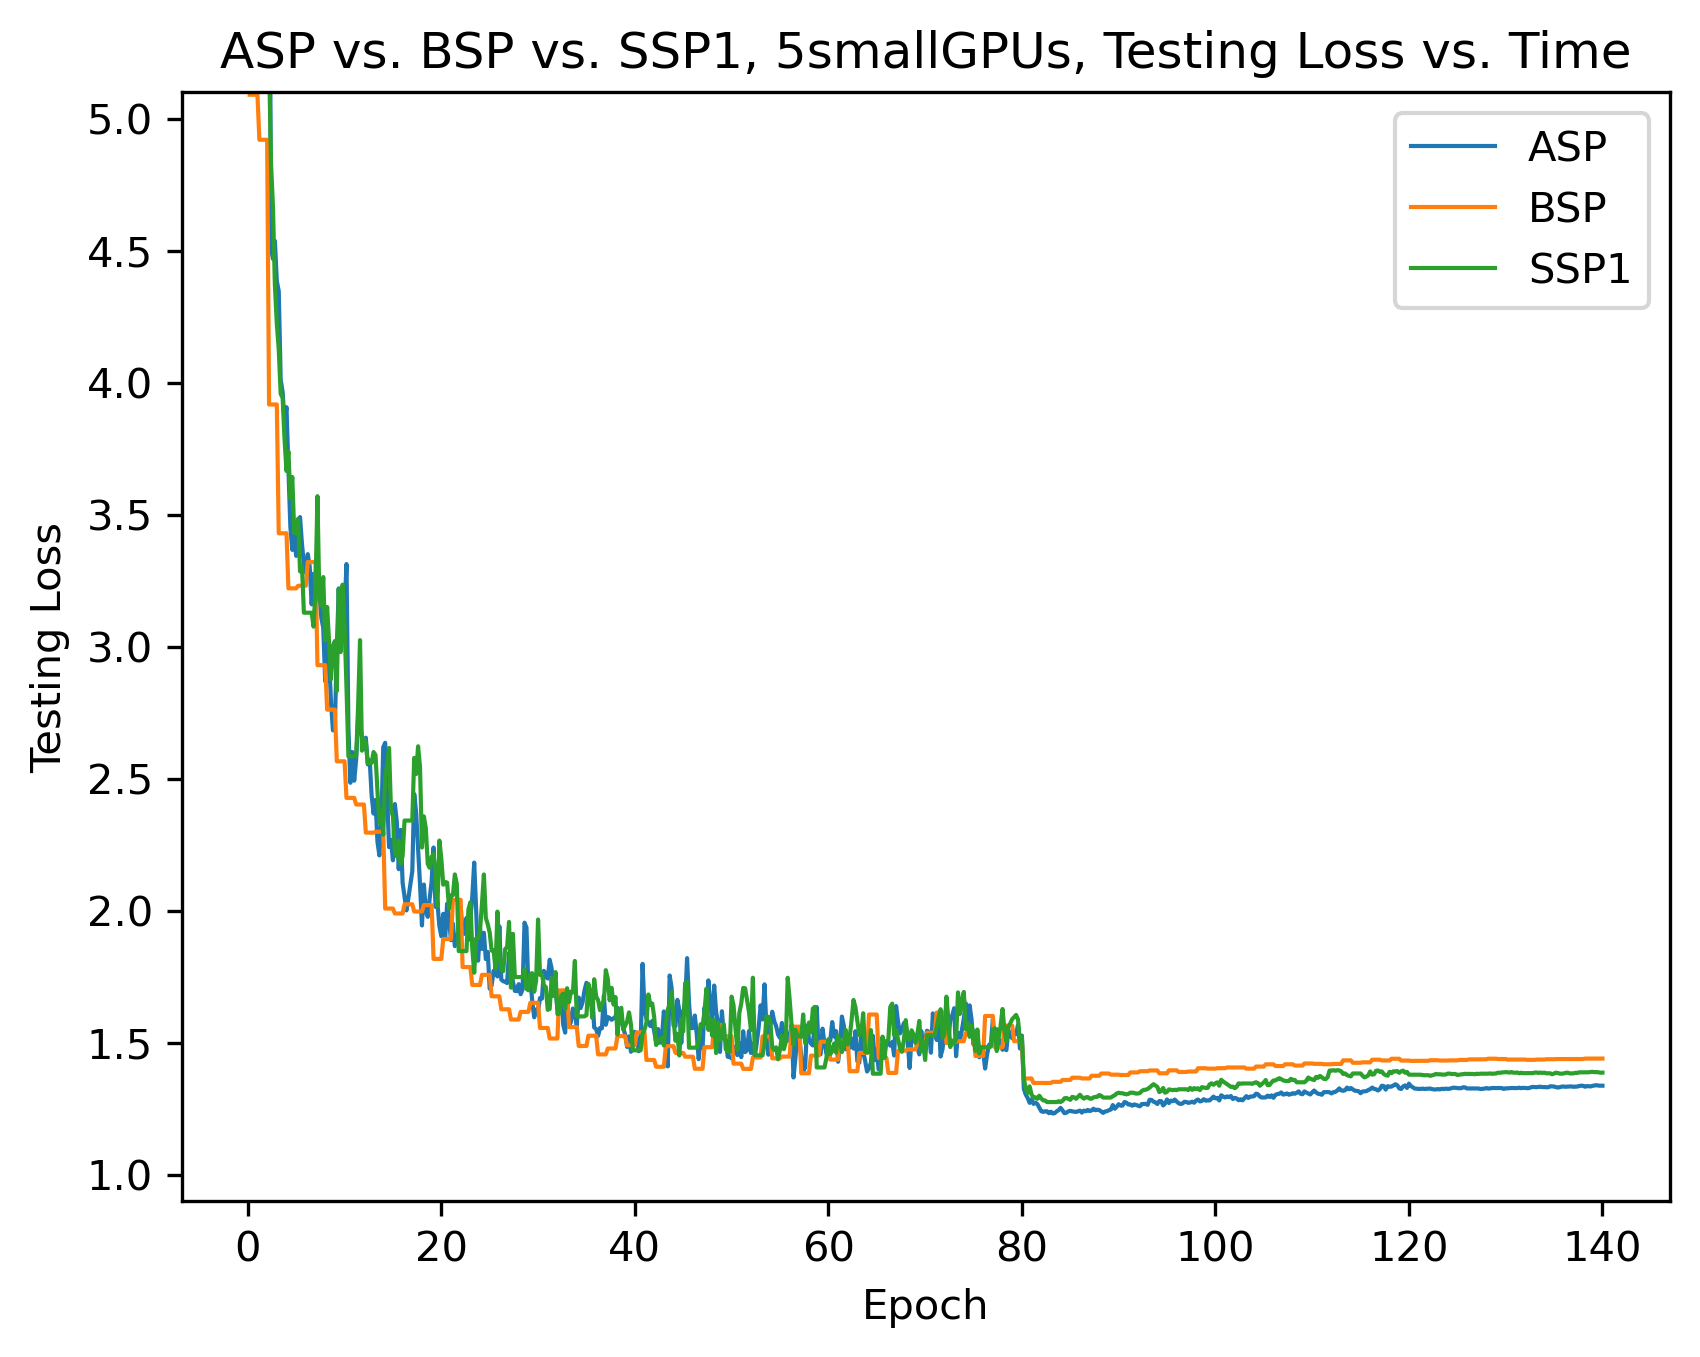

In [13]:
# bonus: ASP vs. BSP vs. SSP
# loss
for i in range(len(small)):
    plt.figure(dpi=DPI)
    plt.plot(np.arange(1, ASP[i].shape[1]+1)/(len(ASP)-1), ASP[i][3],
             label=f'ASP', linewidth=1)
    plt.plot(np.arange(1, BSP[i].shape[1]+1)/(len(BSP)-1), BSP[i][3],
             label=f'BSP', linewidth=1)
    plt.plot(np.arange(1, SSP[i].shape[1]+1)/(len(SSP)-1), SSP[i][3],
             label=f'SSP1', linewidth=1)
    plt.ylim(0.9, 5.1)
    plt.title(f'ASP vs. BSP vs. SSP1, {i}smallGPUs, Testing Loss vs. Time')
    plt.xlabel('Epoch')
    plt.ylabel('Testing Loss')
    plt.legend()
    #plt.show()
if save_figure:
    plt.savefig(f'./temp_figure/result_1080_5GPU_ABS1_{i}smallGPUs_loss.png', transparent=True)

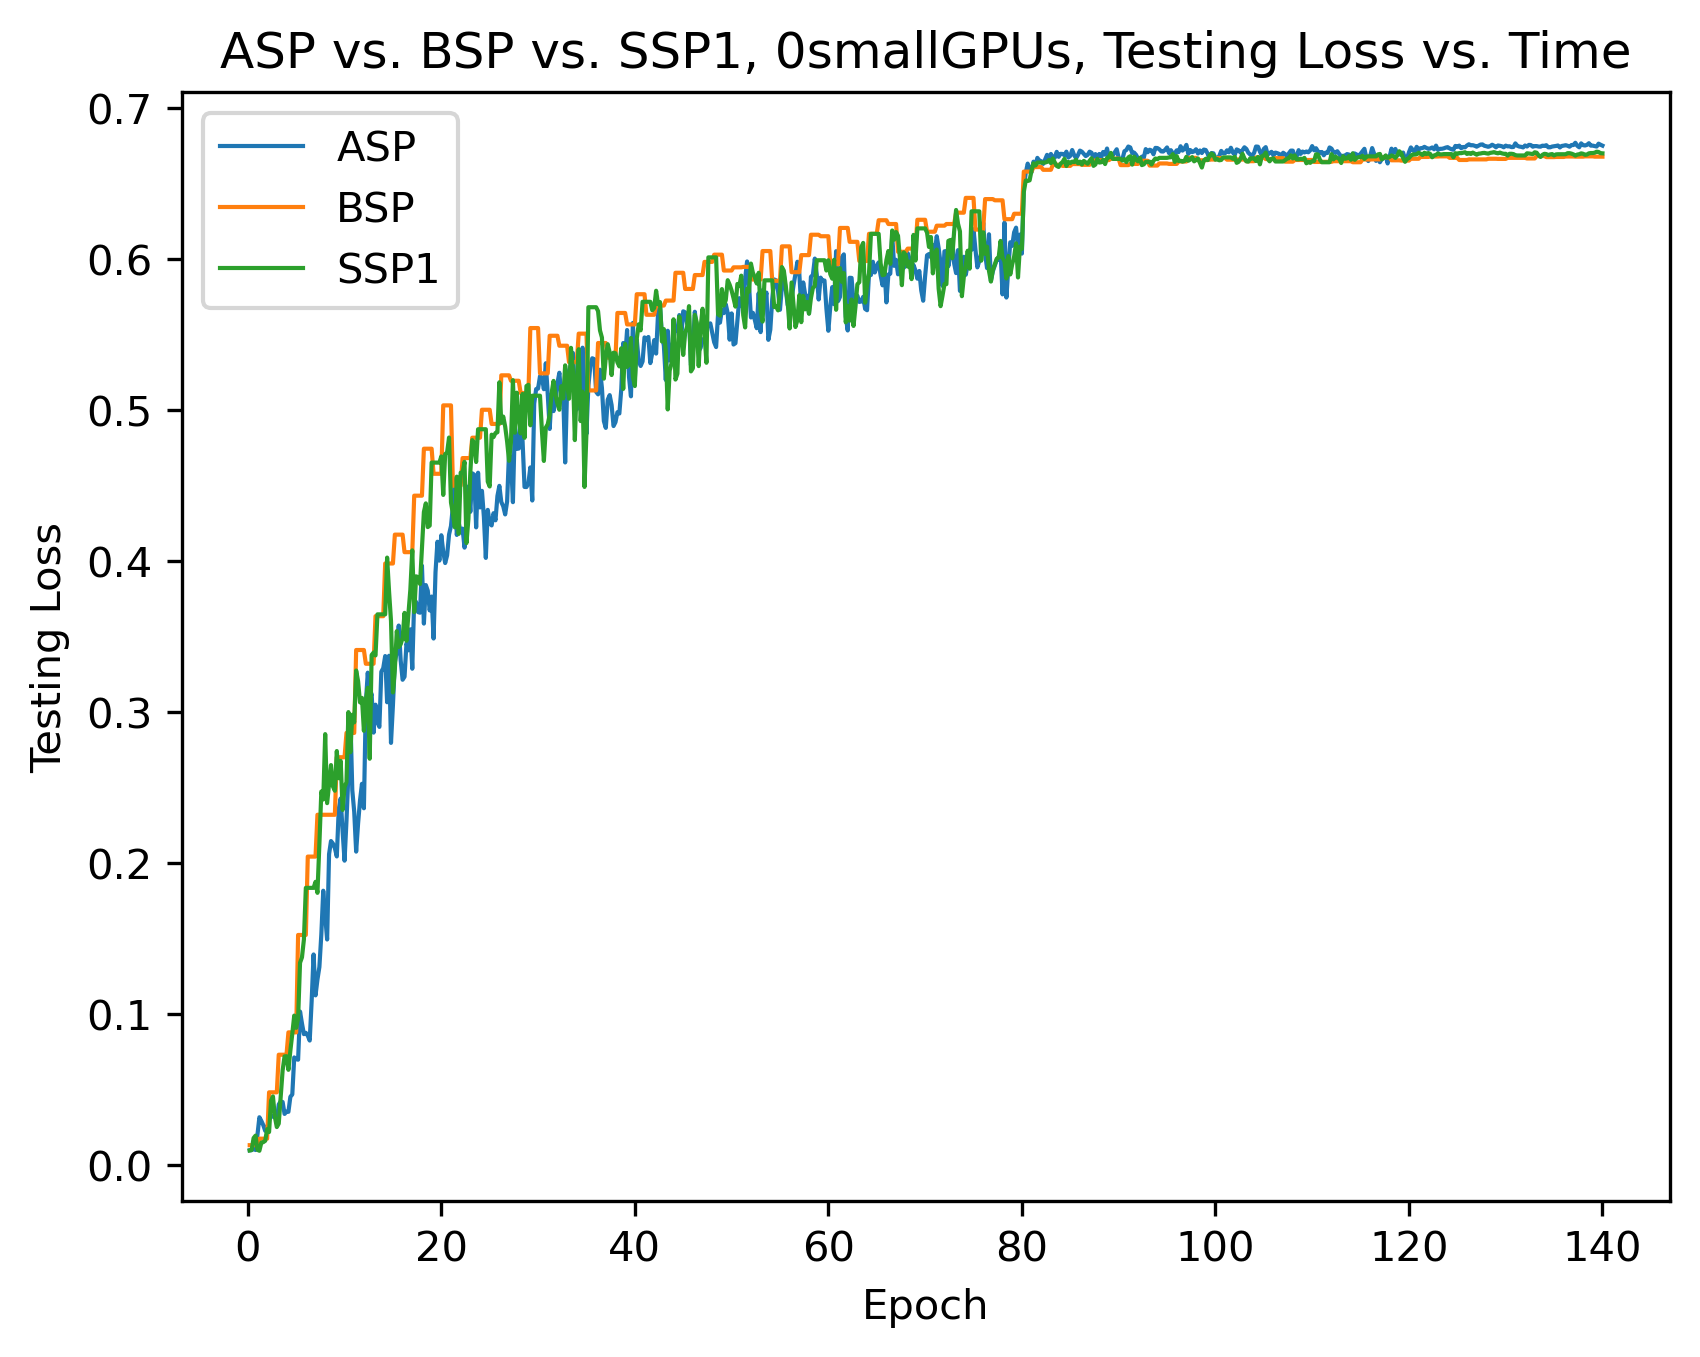

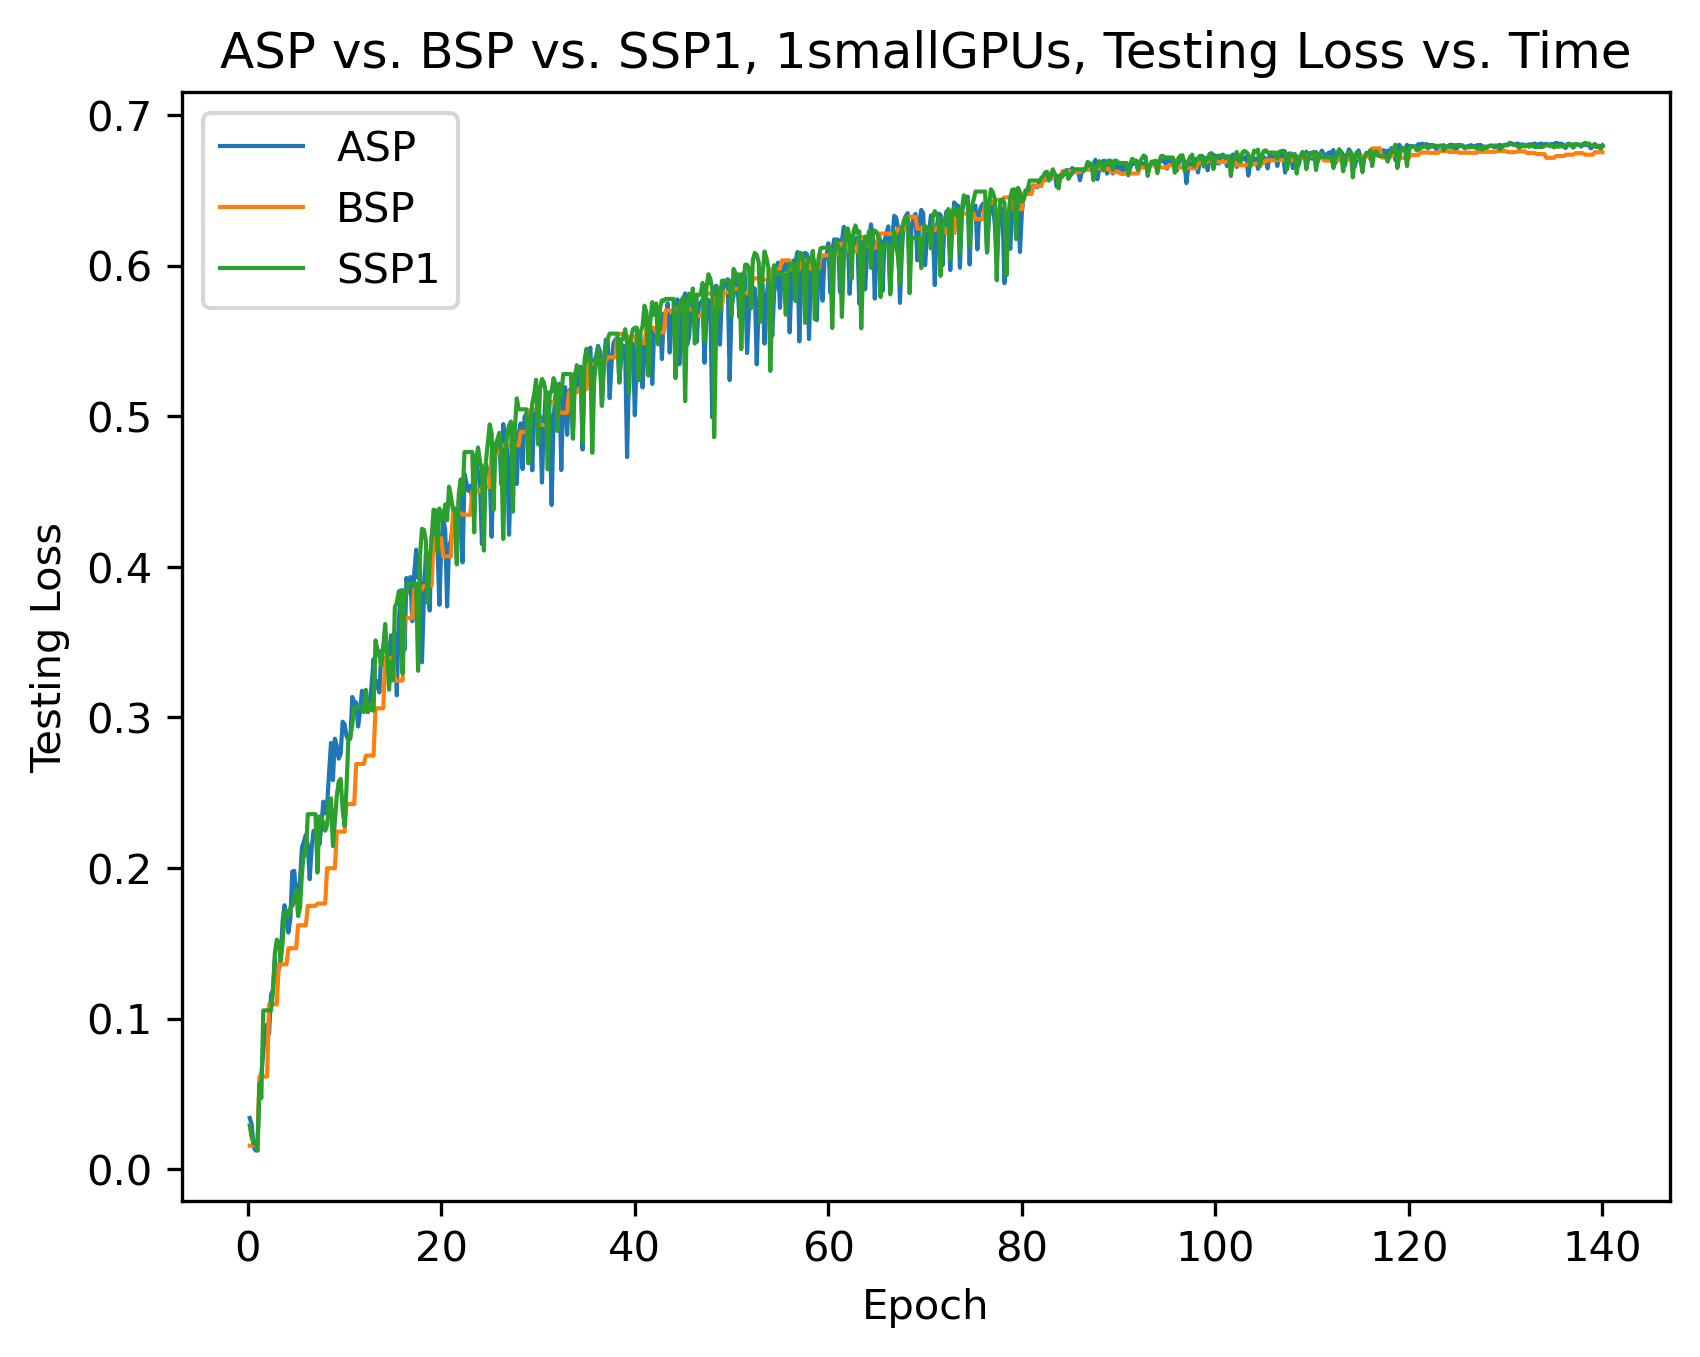

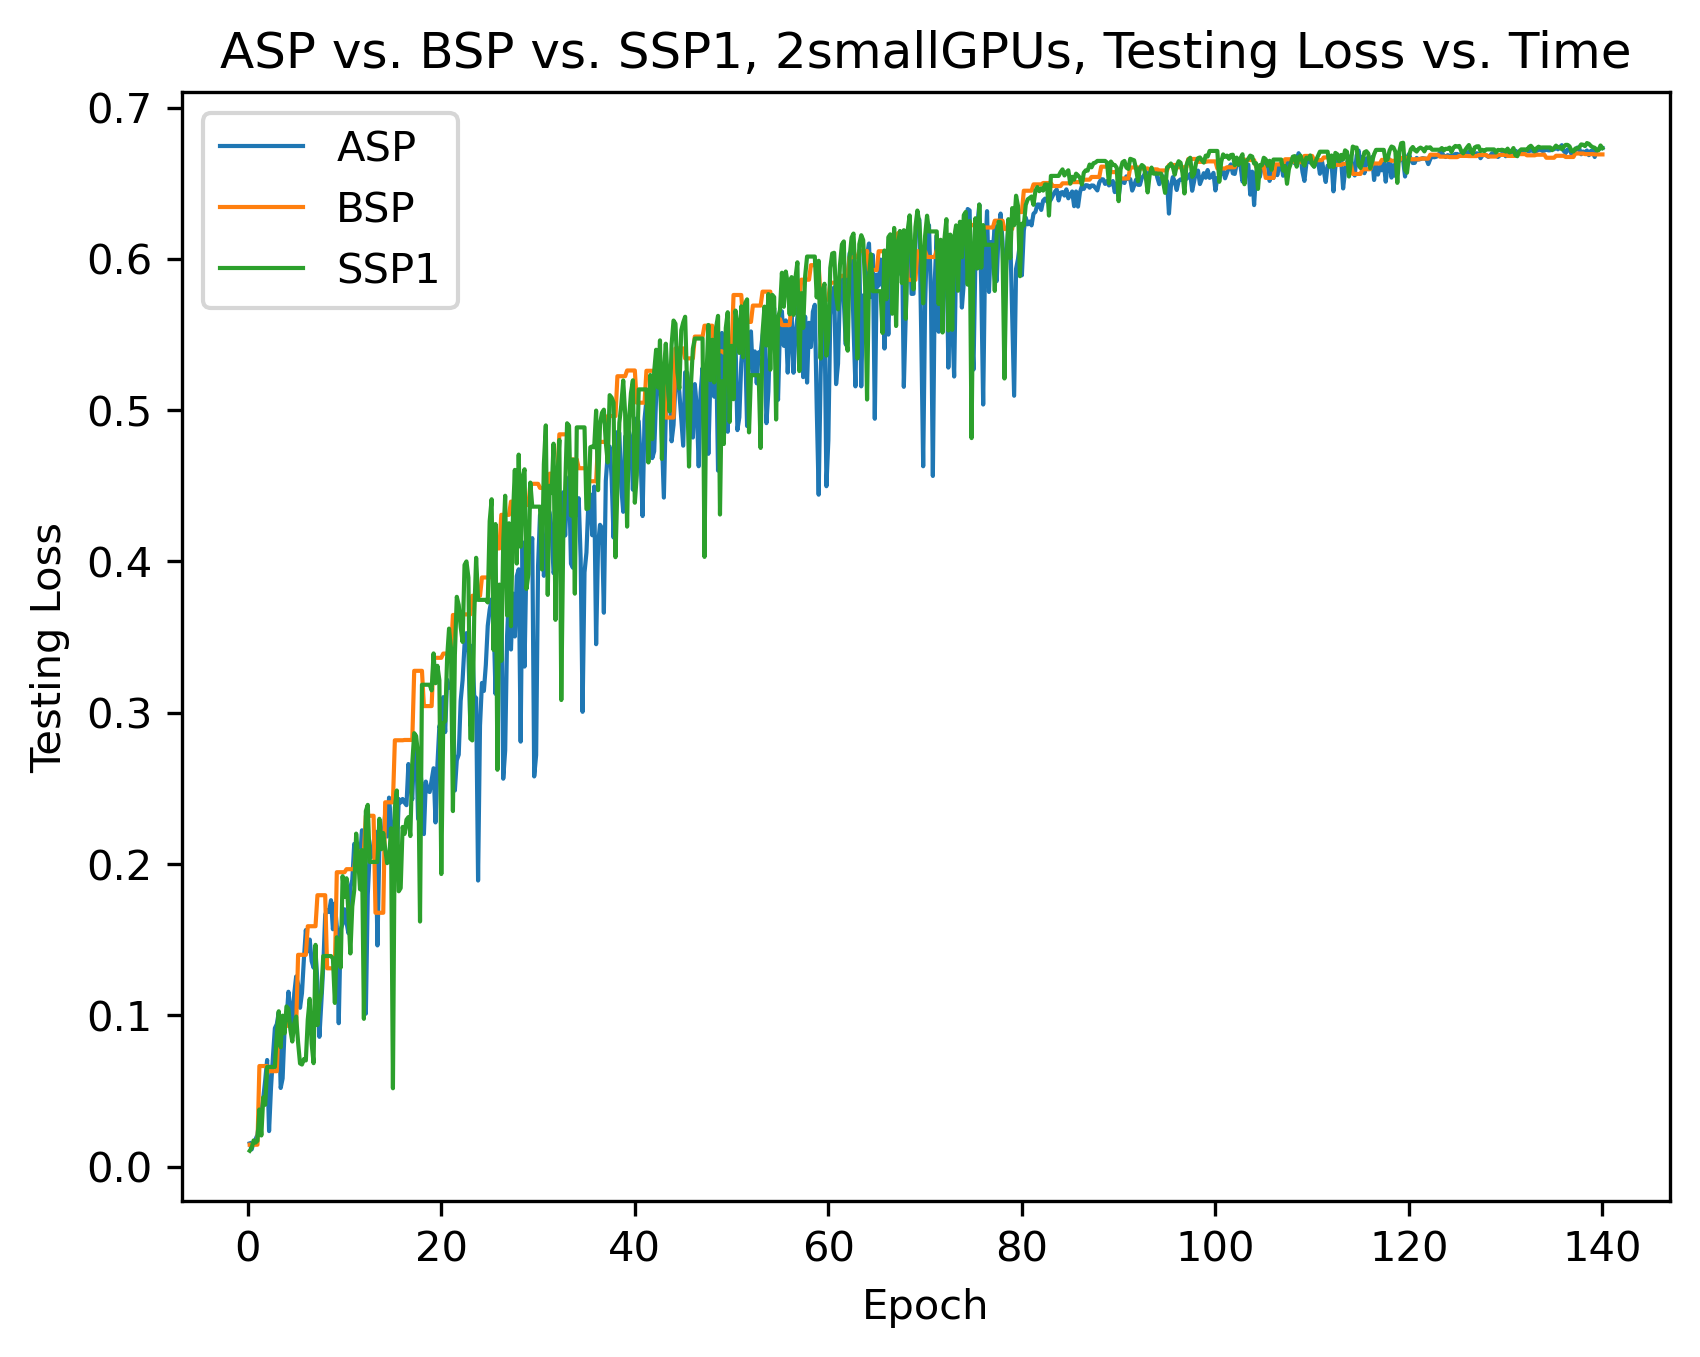

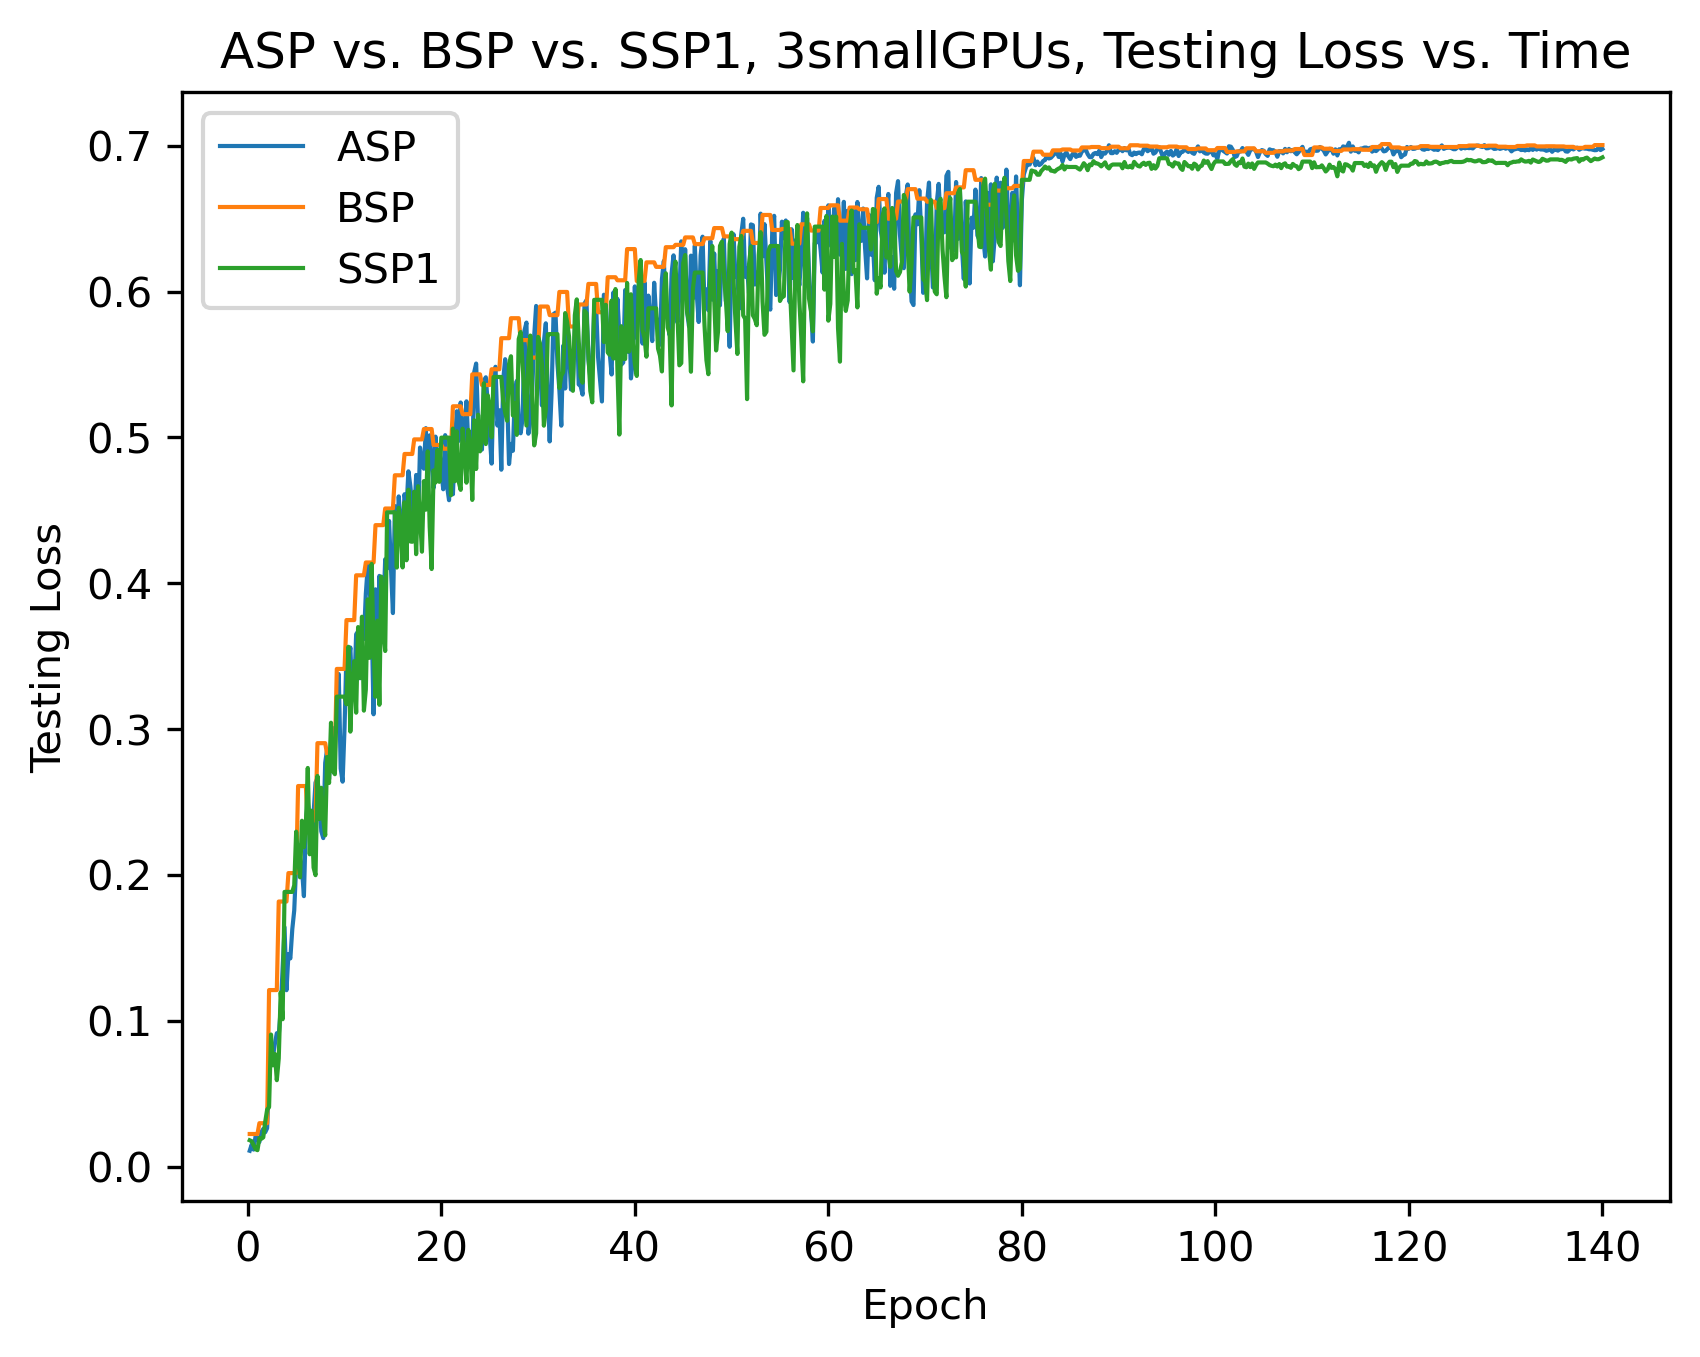

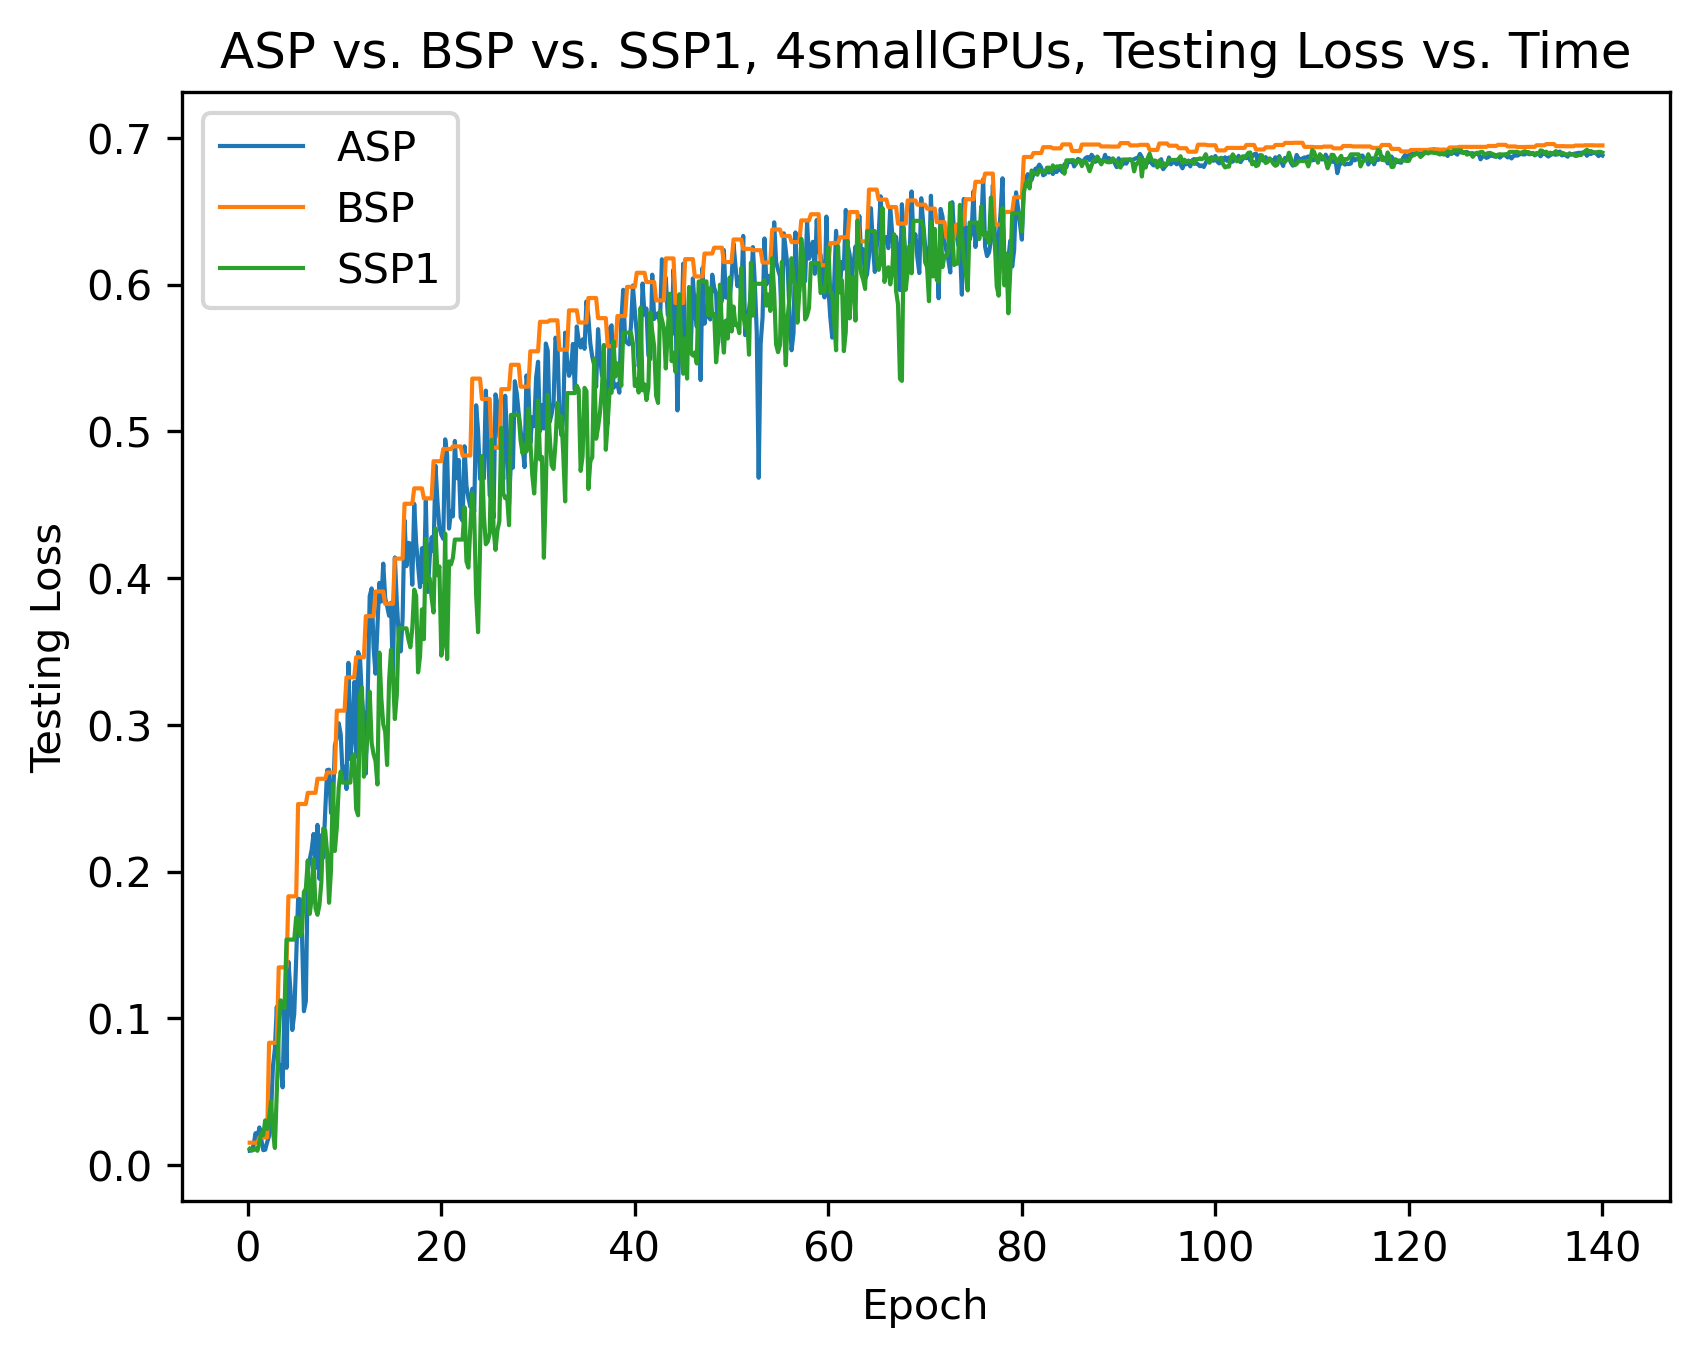

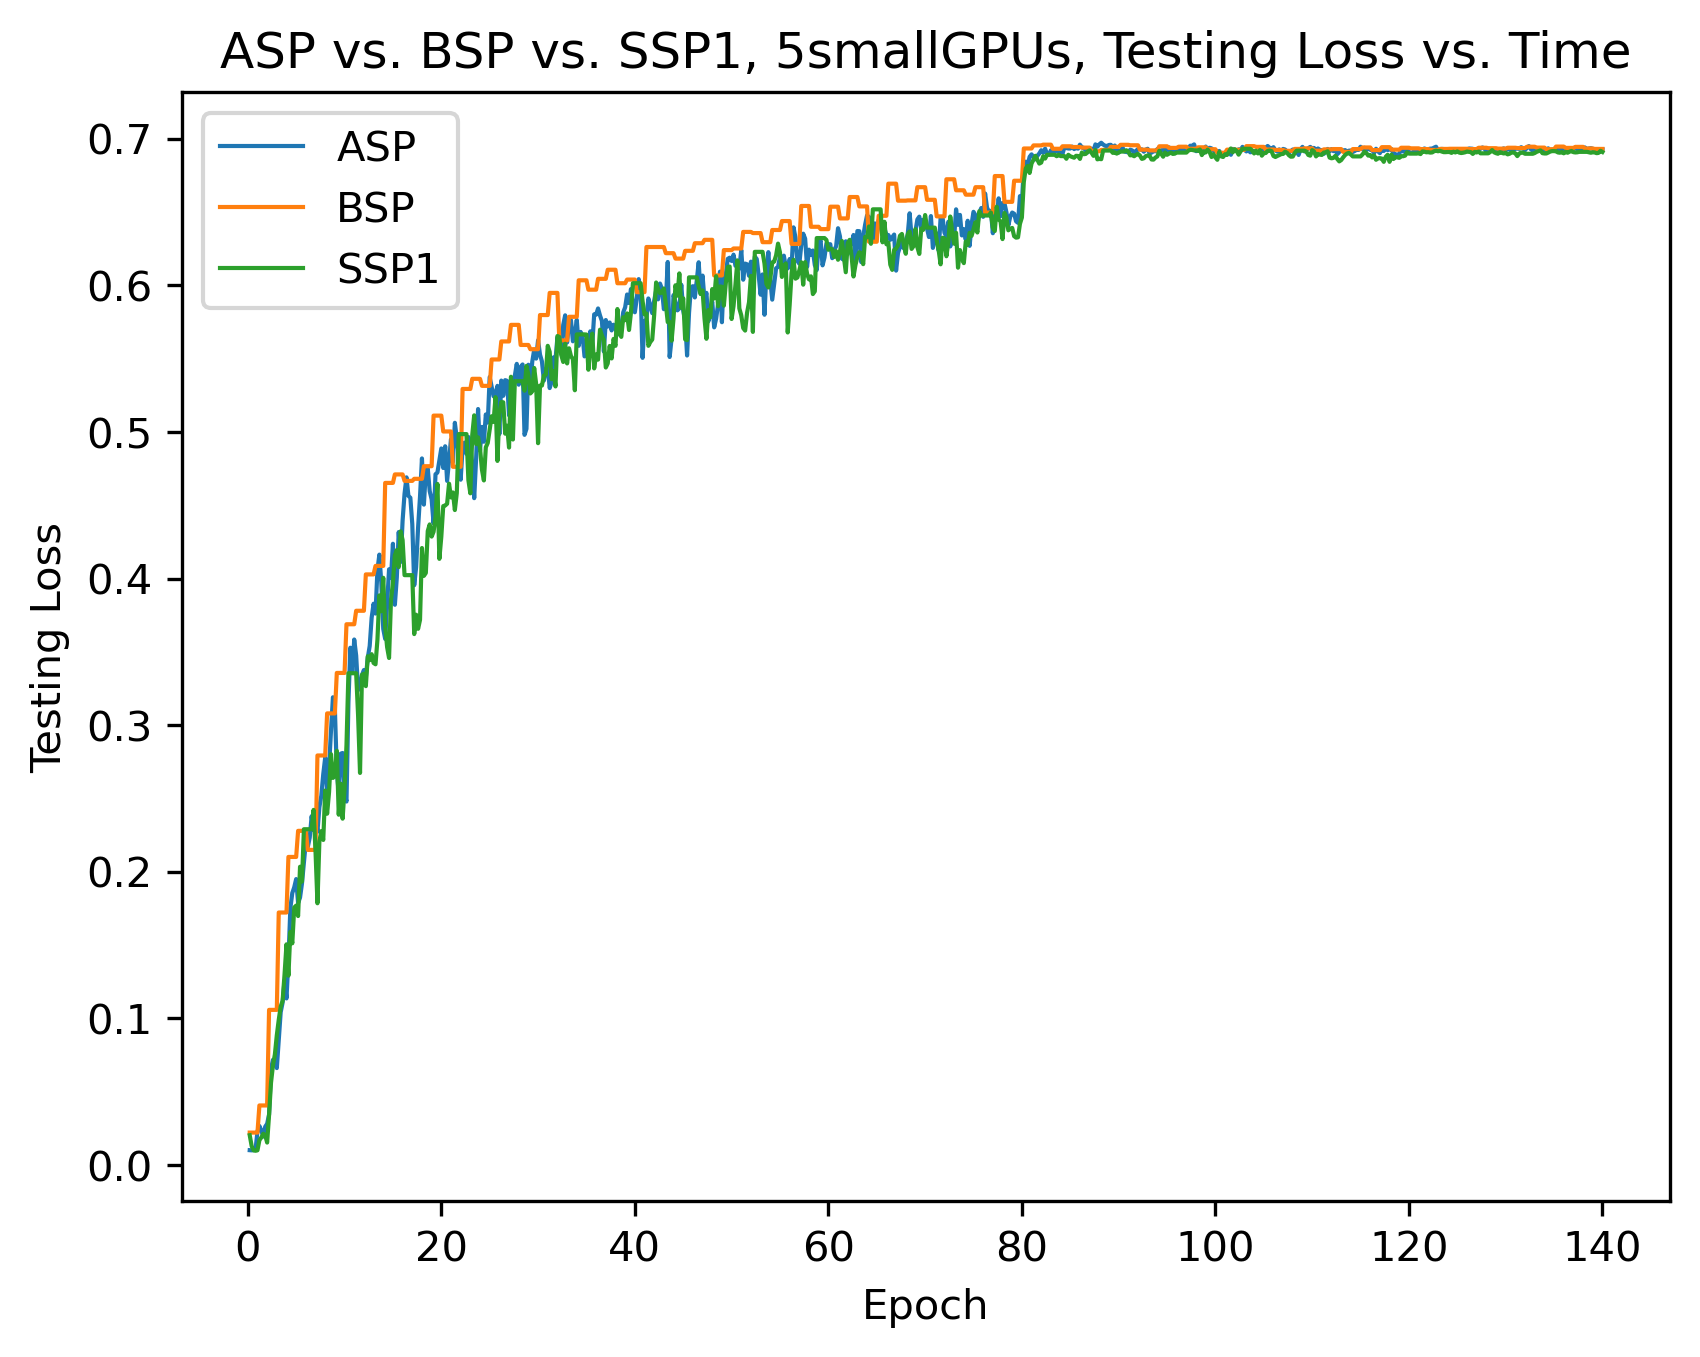

In [14]:
# bonus: ASP vs. BSP vs. SSP
# acc
for i in range(len(small)):
    plt.figure(dpi=DPI)
    plt.plot(np.arange(1, ASP[i].shape[1]+1)/(len(ASP)-1), ASP[i][4],
             label=f'ASP', linewidth=1)
    plt.plot(np.arange(1, BSP[i].shape[1]+1)/(len(BSP)-1), BSP[i][4],
             label=f'BSP', linewidth=1)
    plt.plot(np.arange(1, SSP[i].shape[1]+1)/(len(SSP)-1), SSP[i][4],
             label=f'SSP1', linewidth=1)
    plt.title(f'ASP vs. BSP vs. SSP1, {i}smallGPUs, Testing Loss vs. Time')
    plt.xlabel('Epoch')
    plt.ylabel('Testing Loss')
    plt.legend()
    #plt.show()
if save_figure:
    plt.savefig(f'./temp_figure/result_1080_5GPU_ABS1_{i}smallGPUs_acc.png', transparent=True)